# Creative Gaming: Uplift Modeling

* Team-lead GitHub userid: rsm-xyz123
* Group name:
* Team member names:
    - Isha Rathi
    - Aashvi Trivedi
    - Nivan Vora
    - Rishabh Soni

## Setup

Please complete this python notebook with your group by answering the questions in `cg-uplift-msba.pdf`. Create a Notebook with all your results and comments and push the Notebook to GitHub when your team is done. Make sure to connect the GitHub repo to GradeScope before the due date. All results MUST be reproducible (i.e., the TA and I must be able to recreate your output from the Jupyter Notebook without changes or errors). This means that you should NOT use any python-packages that are not part of the RSM-MSBA docker container.

> Note: Please do not install any packages as part of your Jupyter Notebook submission

This is the second group assignment for MGTA 455 and you will be using Git and GitHub. If two people edit the same file at the same time you could get what is called a "merge conflict". This is not something serious but you should realize that Git will not decide for you who's changes to accept. The team-lead will have to determine the edits to use. To avoid merge conflicts, **always** "pull" changes to the repo before you start working on any files. Then, when you are done, save and commit your changes, and then push them to GitHub. Make "pull first" a habit!

If multiple people are going to work on the assignment at the same time I recommend you work in different notebooks. You can then `%run ...`  these "sub" notebooks from the main assignment file. You can seen an example of this in action below for the `question1.ipynb` notebook

Some group work-flow tips:

* Pull, edit, save, stage, commit, and push
* Schedule who does what and when
* Try to avoid working simultaneously on the same file
* If you are going to work simultaneously, do it in different notebooks, e.g.,
    - question1.ipynb, question2.ipynb, question3.ipynb
* Use the `%run ... ` command to bring different pieces of code together into the main jupyter notebook
* Put python functions in modules that you can import from your notebooks. See the example below for the `example` function defined in `utils/functions.py`

A graphical depiction of the group work-flow is shown below:


![](images/github-group-workflow.png)

In [1]:
import pandas as pd
import pyrsm as rsm

In [2]:
## loading the organic data - this dataset must NOT be changed
cg_organic_control = pd.read_parquet("data/cg_organic_control.parquet").reset_index(drop=True)
cg_organic_control.head()

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,TimesLostSpaceship,TimesKilled,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS
0,no,7,18,0,124,0,81,0,yes,no,8,0,0,4,no,yes,3,2101,no,no
1,no,10,3,2,60,0,18,479,no,no,10,7,0,0,yes,no,7,1644,yes,no
2,no,2,1,0,0,0,0,0,no,no,0,0,0,2,no,no,8,3197,yes,yes
3,no,2,11,1,125,0,73,217,no,no,0,0,0,0,yes,no,6,913,no,no
4,no,8,15,0,0,0,6,51,yes,no,0,0,2,1,yes,no,21,2009,yes,no


In [3]:
rsm.md("data/cg_organic_control_description.md")

## Creative gaming

Game telemetry dataset used for the Creative Gaming: Propensity-to-Buy Modeling case

#### Feature descriptions

* converted: Purchased the Zalon campain ("yes" or "no")
* GameLevel: Highest level of game achieved by the user
* NumGameDays: Number of days user played the game in last month (with or without network connection)
* NumGameDays4Plus: Number of days user played the game in last month with 4 or more total users (this implies using a network connection)
* NumInGameMessagesSent: Number of in-game messages sent to friends
* NumFriends: Number of friends to which the user is connected (necessary to crew together in multiplayer mode) 
* NumFriendRequestIgnored: Number of friend requests this user has not replied to since game inception
* NumSpaceHeroBadges: Number of "Space Hero" badges, the highest distinction for gameplay in Space Pirates
* AcquiredSpaceship: Flag if the user owns a spaceship, i.e., does not have to crew on another user's or NPC's space ship ("no" or "yes")
* AcquiredIonWeapon: Flag if the user owns the powerful "ion weapon" ("no" or "yes")
* TimesLostSpaceship: The number of times the user destroyed his/her spaceship during gameplay. Spaceships need to be re-acquired if destroyed.
* TimesKilled: Number of times the user was killed during gameplay
* TimesCaptain: Number of times in last month that the user played in the role of a captain
* TimesNavigator: Number of times in last month that the user played in the role of a navigator
* PurchasedCoinPackSmall: Flag if the user purchased a small pack of Zathium in last month ("no" or "yes")
* PurchasedCoinPackLarge: Flag if the user purchased a large pack of Zathium in last month ("no" or "yes")
* NumAdsClicked: Number of in-app ads the user has clicked on
* DaysUser: Number of days since user established a user ID with Creative Gaming (for Space Pirates or previous games)
* UserConsole: Flag if the user plays Creative Gaming games on a console ("no" or "yes")
* UserHasOldOS: Flag if the user has iOS version 10 or earlier ("no" or "yes")


In [4]:
## loading the treatment data - this dataset must NOT be changed
cg_ad_treatment = pd.read_parquet("data/cg_ad_treatment.parquet").reset_index(drop=True)
cg_ad_treatment.head()

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesKilled,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,rnd_30k
0,no,6,16,0,0,0,0,0,yes,no,...,0,0,0,no,no,11,1827,no,no,0
1,no,2,8,0,0,0,5,4,no,no,...,0,8,0,yes,no,3,1889,no,yes,1
2,no,6,1,0,0,0,0,0,no,no,...,0,0,0,no,yes,2,1948,yes,no,0
3,yes,7,16,0,102,1,0,194,no,no,...,0,0,0,yes,yes,21,3409,yes,yes,0
4,no,10,1,1,233,0,23,0,no,no,...,0,5,0,no,yes,4,2922,yes,no,0


In [5]:
rsm.md("data/cg_ad_treatment_description.md")

## Creative gaming

Game telemetry dataset used for the Creative Gaming: Propensity-to-Buy Modeling case

#### Feature descriptions

* converted: Purchased the Zalon campain ("yes" or "no")
* GameLevel: Highest level of game achieved by the user
* NumGameDays: Number of days user played the game in last month (with or without network connection)
* NumGameDays4Plus: Number of days user played the game in last month with 4 or more total users (this implies using a network connection)
* NumInGameMessagesSent: Number of in-game messages sent to friends
* NumFriends: Number of friends to which the user is connected (necessary to crew together in multiplayer mode) 
* NumFriendRequestIgnored: Number of friend requests this user has not replied to since game inception
* NumSpaceHeroBadges: Number of "Space Hero" badges, the highest distinction for gameplay in Space Pirates
* AcquiredSpaceship: Flag if the user owns a spaceship, i.e., does not have to crew on another user's or NPC's space ship ("no" or "yes")
* AcquiredIonWeapon: Flag if the user owns the powerful "ion weapon" ("no" or "yes")
* TimesLostSpaceship: The number of times the user destroyed his/her spaceship during gameplay. Spaceships need to be re-acquired if destroyed.
* TimesKilled: Number of times the user was killed during gameplay
* TimesCaptain: Number of times in last month that the user played in the role of a captain
* TimesNavigator: Number of times in last month that the user played in the role of a navigator
* PurchasedCoinPackSmall: Flag if the user purchased a small pack of Zathium in last month ("no" or "yes")
* PurchasedCoinPackLarge: Flag if the user purchased a large pack of Zathium in last month ("no" or "yes")
* NumAdsClicked: Number of in-app ads the user has clicked on
* DaysUser: Number of days since user established a user ID with Creative Gaming (for Space Pirates or previous games)
* UserConsole: Flag if the user plays Creative Gaming games on a console ("no" or "yes")
* UserHasOldOS: Flag if the user has iOS version 10 or earlier ("no" or "yes")
* rnd_30k: Dummy variable that randomly selects 30K customers (1) and the remaining 90K (0)


In [6]:
# show the content of another notebook
rsm.md_notebook("./sub-notebooks/question1.ipynb")


```python
clf_oc = rsm.model.logistic(
    data={"cg_organic_control": cg_organic_control},
    rvar="converted",
    lev="yes",
    evar=["GameLevel", "NumGameDays", "NumGameDays4Plus"],
)
clf_oc.summary()
```


In [7]:
# run python code from another notebook
%run ./sub-notebooks/question1.ipynb

Logistic regression (GLM)
Data                 : cg_organic_control
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus
Null hyp.: There is no effect of x on converted
Alt. hyp.: There is an effect of x on converted

                     OR     OR%  coefficient  std.error  z.value p.value     
Intercept         0.018  -98.2%        -4.02      0.082  -48.956  < .001  ***
GameLevel         1.105   10.5%         0.10      0.011    9.102  < .001  ***
NumGameDays       1.032    3.2%         0.03      0.004    7.493  < .001  ***
NumGameDays4Plus  1.065    6.5%         0.06      0.006   11.159  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.036
Pseudo R-squared (McFadden adjusted): 0.035
Area under the RO Curve (AUC): 0.651
Log-likelihood: -6315.137, AIC: 12638.275, BIC: 12671.511
Chi-squared: 465.178, df(3), p.value < 0.001 
Nr obs: 30,000


In [8]:
# load a custom python module
from utils.functions import example

example()


You just accessed a function from your first python packages!
Change the code in utils/function.py to whatever you need for this assignment
Use 'from utils import functions' to get access to your code
You can add modules to import from by adding additional .py files to the 'utils' directory
Note: If you make changes to the content of this file you will have to restart the notebook kernel to get the updates



In [9]:
cg_ad_random = pd.read_parquet("data/cg_ad_random.parquet").reset_index(drop=True)
cg_ad_random.head()

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,TimesLostSpaceship,TimesKilled,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS
0,no,2,8,0,0,0,5,4,no,no,0,0,8,0,yes,no,3,1889,no,yes
1,no,5,15,0,179,0,50,362,yes,no,22,0,4,4,no,no,2,1308,yes,no
2,no,7,7,0,267,0,64,0,no,no,5,0,0,0,no,yes,1,3562,yes,no
3,no,4,4,0,36,0,0,0,no,no,0,0,0,0,no,no,2,2922,yes,no
4,no,8,17,0,222,10,63,20,yes,no,10,0,9,6,yes,no,4,2192,yes,no


## Question 1 

Prepare the data (5 points)

### (a)

In [10]:
cg_ad_random["ad"] = 1

### (b)

In [11]:
cg_organic_control["ad"] = 0

To analyze the impact of the **Zalon campaign advertisement**, we need to distinguish between:
- **Customers who SAW the ad** (`cg_ad_random` → Treatment Group)
- **Customers who DID NOT see the ad** (`cg_organic_control` → Control Group)

We create a new column:  
- **`ad = 1`** → Assigned to `cg_ad_random` (customers who received the ad).  
- **`ad = 0`** → Assigned to `cg_organic_control` (customers who did not receive the ad).  

### (c)

In [12]:
# Stack the two datasets (combine them)
cg_rct_stacked = pd.concat([cg_organic_control, cg_ad_random], ignore_index=True)
cg_rct_stacked.head()

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesKilled,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,ad
0,no,7,18,0,124,0,81,0,yes,no,...,0,0,4,no,yes,3,2101,no,no,0
1,no,10,3,2,60,0,18,479,no,no,...,7,0,0,yes,no,7,1644,yes,no,0
2,no,2,1,0,0,0,0,0,no,no,...,0,0,2,no,no,8,3197,yes,yes,0
3,no,2,11,1,125,0,73,217,no,no,...,0,0,0,yes,no,6,913,no,no,0
4,no,8,15,0,0,0,6,51,yes,no,...,0,2,1,yes,no,21,2009,yes,no,0


Now, we **combine both datasets** into a single **stacked dataset** (`cg_rct_stacked`).  
This stacked dataset will:
- **Contain both control and treatment groups**.
- Help us **train uplift models** to measure the ad’s effect.
- Allow **fair comparisons** between ad-exposed and non-exposed customers.


### (d)

In [13]:
cg_rct_stacked["training"] = rsm.model.make_train(
    data=cg_rct_stacked, test_size=0.3, strat_var=["converted", "ad"], random_state=1234
)

To train and evaluate our uplift model, we split `cg_rct_stacked` into:
- **Training Set (70%)** → Used to train the model.
- **Testing Set (30%)** → Used to evaluate model performance.

### (e)

In [14]:
cg_rct_stacked.training.value_counts(normalize=True)

training
1.0    0.7
0.0    0.3
Name: proportion, dtype: float64

In [15]:
pd.crosstab(
    cg_rct_stacked.converted,
    [cg_rct_stacked.ad, cg_rct_stacked.training],
    normalize="columns",
).round(2)

ad            0           1      
training    0.0   1.0   0.0   1.0
converted                        
yes        0.06  0.06  0.13  0.13
no         0.94  0.94  0.87  0.87


After splitting the dataset into **70% training and 30% testing**, we now verify whether the distribution of **converted customers (`yes/no`)** is consistent across both sets.

###  Checking the Split Ratio
To ensure that the split was performed correctly, we check the proportion of data assigned to training (`1.0`) and testing (`0.0`):
```python
cg_rct_stacked.training.value_counts(normalize=True)


## Question 2

In [16]:
pd.crosstab(cg_rct_stacked.ad, cg_rct_stacked.training)

training,0.0,1.0
ad,,
0,9000,21000
1,9000,21000


In [17]:
evar = cg_rct_stacked.columns.tolist()
evar = evar[evar.index("GameLevel") : evar.index("UserHasOldOS") + 1]
evar

['GameLevel',
 'NumGameDays',
 'NumGameDays4Plus',
 'NumInGameMessagesSent',
 'NumSpaceHeroBadges',
 'NumFriendRequestIgnored',
 'NumFriends',
 'AcquiredSpaceship',
 'AcquiredIonWeapon',
 'TimesLostSpaceship',
 'TimesKilled',
 'TimesCaptain',
 'TimesNavigator',
 'PurchasedCoinPackSmall',
 'PurchasedCoinPackLarge',
 'NumAdsClicked',
 'DaysUser',
 'UserConsole',
 'UserHasOldOS']

Next, we extract relevant features by selecting columns between `GameLevel` and `UserHasOldOS`, ensuring only predictive variables are included while excluding target variables (`converted`, `ad`). 

This prepares the dataset for training the uplift model.

### Treatment Model


In [18]:
clf_treatment = rsm.model.logistic(
    data={"Cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 1")},
    rvar="converted",
    lev="yes",
    evar=evar,
)
clf_treatment.summary()

Logistic regression (GLM)
Data                 : Cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Null hyp.: There is no effect of x on converted
Alt. hyp.: There is an effect of x on converted

                                OR     OR%  coefficient  std.error  z.value p.value     
Intercept                    0.030  -97.0%        -3.52      0.122  -28.987  < .001  ***
AcquiredSpaceship[yes]       1.088    8.8%         0.08      0.049    1.732   0.083    .
AcquiredIonWeapon[yes]       0.917   -8.3%        -0.09      0.164   -0.533   0.594     
PurchasedCoinPackSmall[yes]  1.045    4.5%         0.04      0.046    0.960   



We train a **Logistic Regression model** on the **treatment group (`ad=1`)** to estimate conversion probability for customers who saw the ad.

### Key Insights:
- **Significant Predictors**:
  - **Higher Game Levels & More Game Days** → Increase conversion likelihood.
  - **Large In-Game Purchases & More Friends** → Positively impact conversion.
  - **More Spaceship Losses** → Negatively correlated with conversion.

- **Model Performance**:
  - **AUC = 0.712**, indicating moderate predictive power.
  - **Statistically significant model fit**.

This model estimates how ad-exposed customers respond to the Zalon campaign. Next, we train a **control model (`ad=0`)** for uplift calculation.


### Control Model

In [19]:
clf_control = rsm.model.logistic(
    data={"Cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 0")},
    rvar="converted",
    lev="yes",
    evar=evar,
)
clf_control.summary()

Logistic regression (GLM)
Data                 : Cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Null hyp.: There is no effect of x on converted
Alt. hyp.: There is an effect of x on converted

                                OR     OR%  coefficient  std.error  z.value p.value     
Intercept                    0.006  -99.4%        -5.18      0.193  -26.809  < .001  ***
AcquiredSpaceship[yes]       1.594   59.4%         0.47      0.072    6.472  < .001  ***
AcquiredIonWeapon[yes]       0.860  -14.0%        -0.15      0.267   -0.566   0.571     
PurchasedCoinPackSmall[yes]  1.029    2.9%         0.03      0.069    0.415   



We train a **Logistic Regression model** on the **control group (`ad=0`)** to estimate conversion probability for customers who did not see the ad. This allows us to compare with the treatment model to measure uplift.

### Key Insights:
- **Significant Predictors**:
  - **Acquired Spaceship, Game Level, and Num Game Days** → Strong positive impact on conversion.
  - **Purchased Coin Pack Large** → Increases likelihood of purchase.
  - **Num Space Hero Badges & Num Friends** → Highly correlated with conversion.

- **Model Performance**:
  - **AUC = 0.831**, indicating strong predictive power.
  - **Chi-square test confirms statistical significance**.

This model provides conversion probabilities for customers without ad exposure. Next, we calculate **uplift scores** by comparing predicted probabilities between control and treatment groups.


### Predictions

In [20]:
cg_rct_stacked["pred_treatment"] = clf_treatment.predict(cg_rct_stacked)["prediction"]
cg_rct_stacked["pred_control"] = clf_control.predict(cg_rct_stacked)["prediction"]

### Uplift Score

In [21]:
cg_rct_stacked["uplift_score"] = cg_rct_stacked.pred_treatment - cg_rct_stacked.pred_control

### Sort the uplift scores in descending order

In [22]:
(
    cg_rct_stacked[["converted", "ad", "training", "pred_treatment", "pred_control", "uplift_score"]]
    .query("training == 0")
    .sort_values("uplift_score", ascending=False)
)

,converted,ad,training,pred_treatment,pred_control,uplift_score
17708,no,0,0.0,0.980868,0.021444,0.959424
16867,no,0,0.0,0.700271,0.008880,0.691391
55710,no,1,0.0,0.796051,0.128002,0.668049
27668,no,0,0.0,0.763933,0.109287,0.654647
30207,no,1,0.0,0.701397,0.068474,0.632923
...,...,...,...,...,...,...
57308,no,1,0.0,0.125744,0.910955,-0.785211
47019,no,1,0.0,0.114816,0.901620,-0.786804
3181,no,0,0.0,0.101766,0.891800,-0.790034
42502,no,1,0.0,0.163282,0.963696,-0.800414




We generate predictions for both groups:
- **`pred_treatment`** → Conversion probability if shown the ad.
- **`pred_control`** → Conversion probability if not shown the ad.

###  Uplift Score Calculation
\[
{Uplift Score} = P(\{converted} | {ad} = 1) - P({converted} | {ad} = 0)
\]
- **Higher scores** → Customers positively influenced by the ad.
- **Negative scores** → Ad exposure reduces likelihood of purchase.

### Sorting Uplift Scores
We rank customers in **descending order** of uplift to identify the most responsive segment for targeted marketing.



## Question 3

In [23]:
tab = rsm.uplift_tab(
    cg_rct_stacked.query("training == 0"),
    "converted",
    "yes",
    "uplift_score",
    "ad",
    1,
    qnt=20,
)
tab

,pred,bins,cum_prop,T_resp,T_n,C_resp,C_n,incremental_resp,inc_uplift,uplift
0,uplift_score,1,0.05,197,450,70,634,147.315457,1.636838,0.327368
1,uplift_score,2,0.10,309,900,99,1182,233.619289,2.595770,0.195969
2,uplift_score,3,0.15,428,1350,125,1686,327.911032,3.643456,0.212857
3,uplift_score,4,0.20,528,1800,152,2175,402.206897,4.468966,0.167007
4,uplift_score,5,0.25,594,2250,166,2684,454.842027,5.053800,0.119162
5,uplift_score,6,0.30,642,2700,183,3150,485.142857,5.390476,0.070186
6,uplift_score,7,0.35,681,3150,195,3658,513.080372,5.700893,0.063045
7,uplift_score,8,0.40,719,3600,200,4127,544.539133,6.050435,0.073783
8,uplift_score,9,0.45,756,4050,210,4577,570.179594,6.335329,0.060000
9,uplift_score,10,0.50,791,4500,231,5076,586.212766,6.513475,0.035694


### Incremental uplift plot

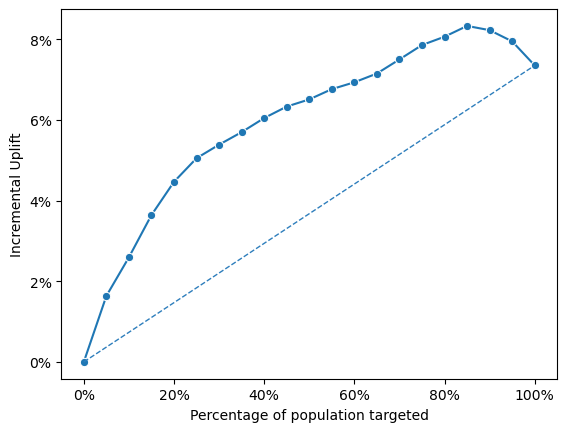

In [24]:
fig = rsm.inc_uplift_plot(
    cg_rct_stacked.query("training == 0"),
    "converted",
    "yes",
    "uplift_score",
    "ad",
    1,
    qnt=20,
)



We analyze **uplift scores across 20 quantiles** to measure the ad's impact.

### Uplift Table Analysis
- **Higher uplift scores** indicate customers more influenced by the ad.
- **Incremental_resp** shows additional conversions driven by the ad.
- **Targeting top bins** maximizes conversion impact.

### Incremental Uplift Plot
- The **solid line** shows observed uplift.
- The **dotted line** is a random baseline.
- A **rising curve** confirms the model successfully identifies high-potential customers.
- The drop occurs because the least responsive or negatively impacted users are included when the entire population is targeted, diluting the overall uplift.



### Ploting the uplift

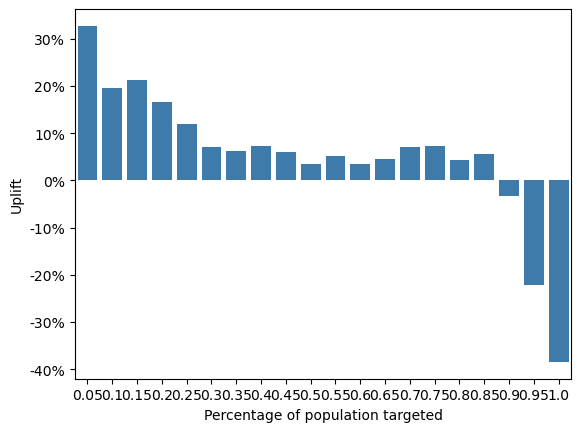

In [25]:
fig = rsm.uplift_plot(
    cg_rct_stacked.query("training == 0"),
    "converted",
    "yes",
    "uplift_score",
    "ad",
    1,
    qnt=20,
)



This plot shows **uplift across different population segments**, helping assess the ad's impact.

###  Interpretation:
- **Positive uplift (left side)**: Top-ranked customers benefit the most from the ad.
- **Near-zero uplift (middle)**: The ad has little to no effect.
- **Negative uplift (right side)**: Ad exposure reduces conversion likelihood.

### Key Takeaway:
Targeting **high uplift score segments** maximizes conversions, while avoiding negative uplift segments prevents wasted ad spend.


## Question 4

We need to target only 30000 customers from 120000 customers. So thats 30,000/120,000 = 25% of the customers.
So 25% of 9000 customers = 2250 customers

In [26]:

# Find the closest `T_n` to 2,250 (25% of 9,000 ad-exposed users)
target_T_n = 2250
closest_row = tab.iloc[(tab["T_n"] - target_T_n).abs().argsort()[:1]]  # Find the closest match

# Extract the corresponding incremental_resp value
incremental_resp_selected = closest_row["incremental_resp"].values[0]

# Define scaling factor (From 9,000 ad-exposed users in test set to 120,000 in full dataset)
test_ad_exposed_users = 9000  
full_ad_exposed_users = 120000  

scaling_factor = full_ad_exposed_users / test_ad_exposed_users  

# Extrapolate total incremental conversions
expected_incremental_conversions = incremental_resp_selected * scaling_factor

# Define revenue and cost parameters
revenue_per_conversion = 14.99  
ad_cost_per_user = 1.50  
total_targeted_customers = 30000  

# Calculate expected revenue from incremental conversions
expected_incremental_revenue = expected_incremental_conversions * revenue_per_conversion

# Calculate total advertising cost
total_ad_cost = total_targeted_customers * ad_cost_per_user

# Compute final incremental profit
incremental_profit = expected_incremental_revenue - total_ad_cost

print(f"Closest T_n: {closest_row['T_n'].values[0]}")
print(f"Selected Incremental Response: {incremental_resp_selected}")
print(f"Expected Incremental Conversions: {expected_incremental_conversions:,.0f}")
print(f"Expected Incremental Revenue: ${expected_incremental_revenue:,.2f}")
print(f"Total Ad Cost: ${total_ad_cost:,.2f}")
print(f"Final Expected Incremental Profit: ${incremental_profit:,.2f}")


Closest T_n: 2250
Selected Incremental Response: 454.8420268256334
Expected Incremental Conversions: 6,065
Expected Incremental Revenue: $90,907.76
Total Ad Cost: $45,000.00
Final Expected Incremental Profit: $45,907.76




We determine the **expected profit** by targeting the top **25% of ad-exposed customers (30,000 out of 120,000)** based on uplift scores.

### Key Calculations:
1. **Find the Closest Uplift Bin** → Identify the uplift score for **2,250 customers** in the test set (25% of 9,000).
2. **Scale to Full Dataset** → Extrapolate incremental conversions from **9,000 (test) to 120,000 (full dataset)**.
3. **Calculate Revenue & Costs**:
   - **Revenue per conversion** = **$14.99**
   - **Ad cost per user** = **$1.50**
   - **Total ad cost** = **30,000 × $1.50**
4. **Compute Final Profit**:
   - **Expected incremental revenue** = Incremental conversions × Revenue per conversion.
   - **Profit** = Incremental revenue - Ad cost.

### Outcome:
Targeting high-uplift customers results in an estimated **profit of $45,987.76**, confirming that uplift modeling **effectively optimizes ad spend**.


## Question 5

### Propensity model

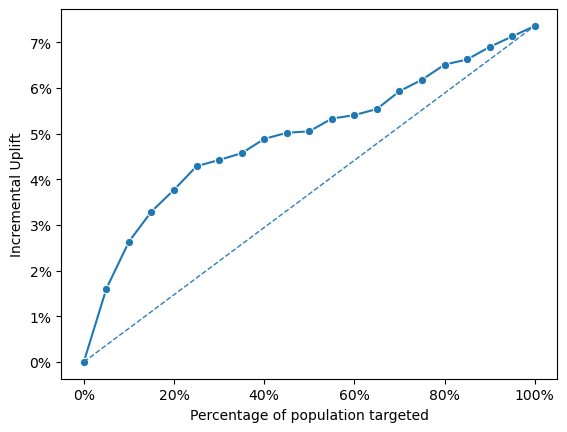

In [27]:
fig = rsm.inc_uplift_plot(
    cg_rct_stacked.query("training == 0"),
    "converted",
    "yes",
    "pred_treatment",
    "ad",
    1,
    qnt=20,
)



We generate an **incremental uplift plot** for the **propensity model**, which predicts conversion likelihood based only on customer characteristics without accounting for ad impact.

### Interpretation:
- The **solid line** represents the observed uplift for different targeted segments.
- The **dotted line** represents random targeting.
- A **gradual uplift increase** suggests the propensity model effectively ranks customers by conversion likelihood but does not differentiate between ad-driven and organic conversions.

### Key Takeaway:
The **propensity model** identifies high-converting users but **does not measure true ad impact**, making it less effective than uplift modeling for ad targeting.


### Compasrion of the two models

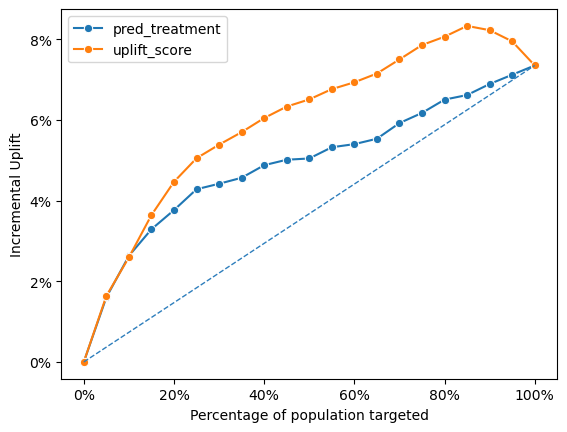

In [28]:
fig = rsm.inc_uplift_plot(
    cg_rct_stacked.query("training == 0"),
    "converted",
    "yes",
    ["pred_treatment", "uplift_score"],
    "ad",
    1,
    qnt=20,
)

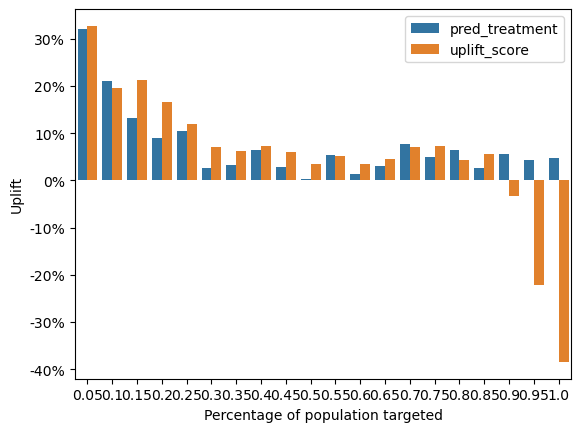

In [29]:
fig = rsm.uplift_plot(
    cg_rct_stacked.query("training == 0"),
    "converted",
    "yes",
    ["pred_treatment", "uplift_score"],
    "ad",
    1,
    qnt=20,
)

 Uplift Model vs. Propensity Model Comparison

We evaluate the effectiveness of the **uplift model** against the **propensity model** to determine which better identifies customers who convert due to the ad.

###  Key Insights:
1. **Incremental Uplift Plot**:
   - The **uplift model (orange line)** consistently delivers **higher incremental uplift** than the **propensity model (blue line)**.
   - This indicates that the uplift model more accurately isolates customers who **convert because of the ad**, rather than those who would purchase regardless.

2. **Uplift Distribution**:
   - The uplift model **prioritizes ad-responsive customers**, showing strong positive uplift for the top segments.
   - The propensity model **fails to distinguish between natural buyers and ad-driven conversions**, leading to suboptimal targeting.

### Conclusion:
The **uplift model is superior** for ad targeting as it ensures marketing efforts focus on customers who are **genuinely influenced by the ad**, maximizing incremental conversions and ROI.


## Question 6

### Uplift table for propensity model

In [30]:
tab_prop = rsm.uplift_tab(
    cg_rct_stacked.query("training == 0"),
    "converted",
    "yes",
    "pred_treatment",
    "ad",
    1,
    qnt=20,
)
tab_prop

,pred,bins,cum_prop,T_resp,T_n,C_resp,C_n,incremental_resp,inc_uplift,uplift
0,pred_treatment,1,0.05,204,450,80,603,144.298507,1.603317,0.320663
1,pred_treatment,2,0.10,326,900,112,1131,236.875332,2.631948,0.210505
2,pred_treatment,3,0.15,430,1350,159,1605,296.261682,3.291796,0.131955
3,pred_treatment,4,0.20,525,1800,206,1994,339.042126,3.767135,0.090288
4,pred_treatment,5,0.25,615,2250,239,2344,385.584471,4.284272,0.105714
5,pred_treatment,6,0.30,672,2700,285,2807,397.863912,4.420710,0.027315
6,pred_treatment,7,0.35,726,3150,316,3162,411.199241,4.568880,0.032676
7,pred_treatment,8,0.40,775,3600,336,3603,439.279767,4.880886,0.063537
8,pred_treatment,9,0.45,813,4050,361,4044,451.464392,5.016271,0.027755
9,pred_treatment,10,0.50,838,4500,386,4527,454.302187,5.047802,0.003796


### Profits for propensity model

In [31]:

# Step 2: Find the closest `T_n` to 2,250 (25% of 9,000 ad-exposed users)
target_T_n = 2250
closest_row = tab_prop.iloc[(tab_prop["T_n"] - target_T_n).abs().argsort()[:1]]  

# Step 3: Extract the corresponding incremental_resp value
incremental_resp_selected = closest_row["incremental_resp"].values[0]

# Step 4: Define scaling factor (From 9,000 ad-exposed users in test set to 120,000 in full dataset)
test_ad_exposed_users = 9000  
full_ad_exposed_users = 120000  

scaling_factor = full_ad_exposed_users / test_ad_exposed_users  

# Step 5: Extrapolate total incremental conversions
expected_incremental_conversions = incremental_resp_selected * scaling_factor

# Step 6: Define revenue and cost parameters
revenue_per_conversion = 14.99  
ad_cost_per_user = 1.50  
total_targeted_customers = 30000  

# Step 7: Calculate expected revenue from incremental conversions
expected_incremental_revenue = expected_incremental_conversions * revenue_per_conversion

# Step 8: Calculate total advertising cost
total_ad_cost = total_targeted_customers * ad_cost_per_user

# Step 9: Compute final incremental profit
incremental_profit = expected_incremental_revenue - total_ad_cost

# Step 10: Print the results
print(f"Closest T_n: {closest_row['T_n'].values[0]}")
print(f"Selected Incremental Response: {incremental_resp_selected}")
print(f"Expected Incremental Conversions: {expected_incremental_conversions:,.0f}")
print(f"Expected Incremental Revenue: ${expected_incremental_revenue:,.2f}")
print(f"Total Ad Cost: ${total_ad_cost:,.2f}")
print(f"Final Expected Incremental Profit: ${incremental_profit:,.2f}")


Closest T_n: 2250
Selected Incremental Response: 385.5844709897611
Expected Incremental Conversions: 5,141
Expected Incremental Revenue: $77,065.48
Total Ad Cost: $45,000.00
Final Expected Incremental Profit: $32,065.48


#  Profit Estimation Using the Propensity Model

We evaluate the **profitability of targeting customers using the propensity model** and compare it to the uplift model.

### Key Calculations:
1. **Uplift Table for Propensity Model**:
   - Customers are ranked into **20 quantiles** based on their **predicted conversion probability (`pred_treatment`)**.
   - **Incremental responses** are estimated to measure additional conversions driven by targeting.

2. **Scaling to Full Dataset**:
   - **Targeting the top 25% (2,250 customers in test set, scaled to 30,000 in full dataset)**.
   - **Incremental conversions** are extrapolated to 120,000 customers.

3. **Revenue and Cost Estimation**:
   - **Revenue per conversion** = **$14.99**.
   - **Ad cost per targeted customer** = **$1.50**.
   - **Total ad cost** = **30,000 × $1.50**.

4. **Final Profit Calculation**:
   - **Expected incremental revenue** = Incremental conversions × Revenue per conversion.
   - **Final profit** = Expected revenue - Total ad cost.

### Outcome:
- **Expected profit using the propensity model: $32,065.48**.
- **Expected profit using the uplift model: $45,907.76**.
- **Conclusion**: The uplift model is **more effective** as it accounts for **ad-driven conversions**, ensuring better-targeted ad spending.


## Question 7

### Nueral Network

### NN Treatment Base Model

In [32]:
clf_nn_treatment = rsm.model.mlp(
    {"Cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 1")},
    rvar="converted",
    lev="yes",
    evar=evar,
    hidden_layer_sizes=(1,),
    alpha=0.001,
)
clf_nn_treatment.summary()

Multi-layer Perceptron (NN)
Data                 : Cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Model type           : classification
Nr. of features      : (19, 19)
Nr. of weights       : 20
Nr. of observations  : 21,000
Hidden_layer_sizes   : (1,)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.001
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 1000000
random_state         : 1234
AUC                  : 0.712

Raw data             :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriend

#  Neural Network Treatment Model

We train a **Neural Network (MLP)** on the **treatment group (`ad=1`)** to predict conversion probability for ad-exposed customers.

### Model Summary:
- **Features Used:** Engagement, purchase behavior, and in-game interactions.
- **Hidden Layers:** 1 | **Activation Function:** Tanh
- **Regularization (Alpha):** 0.001 | **Solver:** lbfgs
- **AUC Score:** **0.712** (moderate predictive power)
- **Observations:** 21,000 customers in the treatment group.

### Key Takeaway:
The **Neural Network captures complex relationships in the data** and offers an alternative to traditional models. 


### NN Control Base Model

In [33]:
clf_nn_control = rsm.model.mlp(
    {"Cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 0")},
    rvar="converted",
    lev="yes",
    evar=evar,
    hidden_layer_sizes=(1,),
    alpha=0.001,
)
clf_nn_control.summary()

Multi-layer Perceptron (NN)
Data                 : Cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Model type           : classification
Nr. of features      : (19, 19)
Nr. of weights       : 20
Nr. of observations  : 21,000
Hidden_layer_sizes   : (1,)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.001
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 1000000
random_state         : 1234
AUC                  : 0.841

Raw data             :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriend

#  Neural Network Control Model

We train a **Neural Network (MLP)** on the **control group (`ad=0`)** to estimate conversion probability for customers who did not see the ad.

###  Model Summary:
- **Features Used:** Engagement, purchase behavior, and user attributes.
- **Hidden Layers:** 1 | **Activation Function:** Tanh
- **Regularization (Alpha):** 0.001 | **Solver:** lbfgs
- **AUC Score:** **0.841** (higher predictive power than treatment model).
- **Observations:** 21,000 customers in the control group.


With a **higher AUC (0.841)** than the treatment model, the **control model provides a strong baseline for uplift comparison**. 


### Hypertuning

In [34]:
import numpy as np
hls = [(i,) for i in range(1, 11)]
param_grid = {"hidden_layer_sizes": hls, "alpha": np.arange(0.0, 1.1, 0.1)}
scoring = {"AUC": "roc_auc"}
param_grid

{'hidden_layer_sizes': [(1,),
  (2,),
  (3,),
  (4,),
  (5,),
  (6,),
  (7,),
  (8,),
  (9,),
  (10,)],
 'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}

In [35]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
cv_nn_control = GridSearchCV(
    clf_nn_control.fitted,
    param_grid,
    scoring=scoring,
    cv=stratified_k_fold,
    n_jobs=4,
    refit=list(scoring.keys())[0],
    verbose=5,
    ).fit(clf_nn_control.data_onehot, clf_nn_control.data.converted)

Fitting 5 folds for each of 110 candidates, totalling 550 fits


In [36]:
cv_nn_control.best_params_

{'alpha': 1.0, 'hidden_layer_sizes': (4,)}

In [37]:
cv_nn_control.best_score_

0.8463517908630351

In [38]:
clf_nn_control_final = rsm.model.mlp(
    {"Cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 0")},
    rvar="converted",
    lev="yes",
    evar=evar,
    **cv_nn_control.best_params_
)
clf_nn_control_final.summary()

Multi-layer Perceptron (NN)
Data                 : Cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Model type           : classification
Nr. of features      : (19, 19)
Nr. of weights       : 80
Nr. of observations  : 21,000
Hidden_layer_sizes   : (4,)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 1.0
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 1000000
random_state         : 1234
AUC                  : 0.862

Raw data             :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends 

#  Optimized Neural Network Model

We fine-tuned the **Neural Network model** using **GridSearchCV** to optimize performance.

###  **Best Hyperparameters:**
- **Hidden Layer Size:** (4,)
- **Alpha:** 1.0
- **Best AUC Score:** **0.862** (Improved from base model)



### Hyperparameter NN Treatment

In [39]:
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
cv_nn_treatment= GridSearchCV(
    clf_nn_control.fitted,
    param_grid,
    scoring=scoring,
    cv=stratified_k_fold,
    n_jobs=4,
    refit=list(scoring.keys())[0],
    verbose=5,
    ).fit(clf_nn_treatment.data_onehot, clf_nn_treatment.data.converted)

Fitting 5 folds for each of 110 candidates, totalling 550 fits


In [40]:
cv_nn_treatment.best_params_

{'alpha': 0.0, 'hidden_layer_sizes': (8,)}

In [41]:
cv_nn_treatment.best_score_

0.7646120774393855

In [42]:
clf_nn_treatment_final = rsm.model.mlp(
    {"Cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 1")},
    rvar="converted",
    lev="yes",
    evar=evar,
    **cv_nn_treatment.best_params_
)
clf_nn_treatment_final.summary()

Multi-layer Perceptron (NN)
Data                 : Cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Model type           : classification
Nr. of features      : (19, 19)
Nr. of weights       : 160
Nr. of observations  : 21,000
Hidden_layer_sizes   : (8,)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.0
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 1000000
random_state         : 1234
AUC                  : 0.81

Raw data             :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends 

#  Optimized Neural Network Treatment Model  

We fine-tuned the **Neural Network (`ad=1`)** to improve prediction accuracy.  

###  **Best Parameters:**  
- **Hidden Layers:** (8,) | **Alpha:** 0.0  
- **Best AUC Score:** **0.81** (Improved from 0.764)  


### Predictions

In [43]:
cg_rct_stacked["pred_nn_treatment"] = clf_nn_treatment_final.predict(cg_rct_stacked)["prediction"]
cg_rct_stacked["pred_nn_control"] = clf_nn_control_final.predict(cg_rct_stacked)["prediction"]

### Uplift Score

In [44]:
cg_rct_stacked["uplift_nn_score"] = cg_rct_stacked.pred_nn_treatment - cg_rct_stacked.pred_nn_control

In [45]:
(
    cg_rct_stacked[["converted", "ad", "training", "pred_nn_treatment", "pred_nn_control", "uplift_nn_score"]]
    .query("training == 0")
    .sort_values("uplift_nn_score", ascending=False)
)

,converted,ad,training,pred_nn_treatment,pred_nn_control,uplift_nn_score
11967,no,0,0.0,0.925326,0.066651,0.858675
48115,yes,1,0.0,0.935105,0.087395,0.847710
8624,no,0,0.0,0.873007,0.039043,0.833964
16168,no,0,0.0,0.861936,0.032338,0.829598
6494,no,0,0.0,0.907592,0.080338,0.827255
...,...,...,...,...,...,...
51382,no,1,0.0,0.078212,0.806719,-0.728507
56622,no,1,0.0,0.042541,0.783638,-0.741097
39613,no,1,0.0,0.070575,0.829954,-0.759379
57225,no,1,0.0,0.046096,0.831357,-0.785261


In [46]:
tab_nn = rsm.uplift_tab(cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_nn_score", "ad", 1, qnt = 20)
tab_nn

,pred,bins,cum_prop,T_resp,T_n,C_resp,C_n,incremental_resp,inc_uplift,uplift
0,uplift_nn_score,1,0.05,199,450,69,575,145.000000,1.611111,0.322222
1,uplift_nn_score,2,0.10,341,900,103,1042,252.036468,2.800405,0.242750
2,uplift_nn_score,3,0.15,468,1350,139,1562,347.865557,3.865173,0.212991
3,uplift_nn_score,4,0.20,567,1800,171,2086,419.444871,4.660499,0.158931
4,uplift_nn_score,5,0.25,654,2250,197,2617,484.626672,5.384741,0.144369
5,uplift_nn_score,6,0.30,727,2700,220,3124,536.859155,5.965102,0.116857
6,uplift_nn_score,7,0.35,790,3150,233,3576,584.756711,6.497297,0.111239
7,uplift_nn_score,8,0.40,843,3600,259,4102,615.696246,6.841069,0.068348
8,uplift_nn_score,9,0.45,887,4050,269,4567,648.451719,7.205019,0.076272
9,uplift_nn_score,10,0.50,917,4500,282,5062,666.308574,7.403429,0.040404


#  Uplift Score Calculation & Analysis  

We compute **uplift scores** by comparing predictions from the optimized **Neural Network treatment (`ad=1`)** and **control (`ad=0`)** models.  

### **Key Steps:**  
- **Predictions:** Estimate conversion probabilities for both groups.  
- **Uplift Calculation:**  
  \[
  \text{uplift\_nn\_score} = \text{pred\_nn\_treatment} - \text{pred\_nn\_control}
  \]
- **Ranking Customers:** High uplift scores indicate stronger ad influence.

### **Uplift Table Insights:**  
- **20 quantiles** of uplift scores reveal **ad responsiveness**.  
- **Higher bins** → Greater incremental conversions.  
- **Negative uplift** → Potential ad fatigue or wasted spend.

###  **Key Takeaway:**  
Uplift modeling effectively ranks customers based on **true ad impact**, improving **targeting efficiency**.


### Incremental Uplift Plot

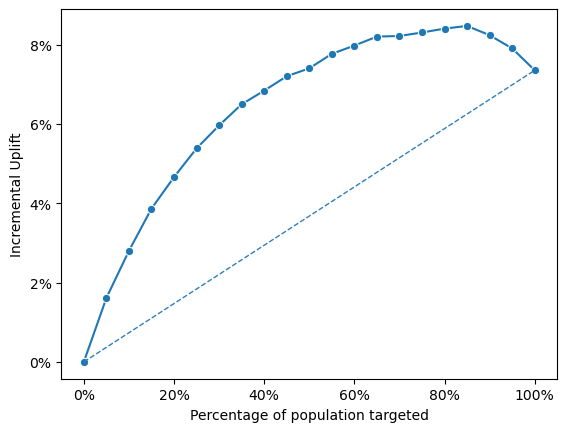

In [47]:
fig_nn = rsm.inc_uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_nn_score", "ad", 1, qnt=20)

### Plotting the uplift

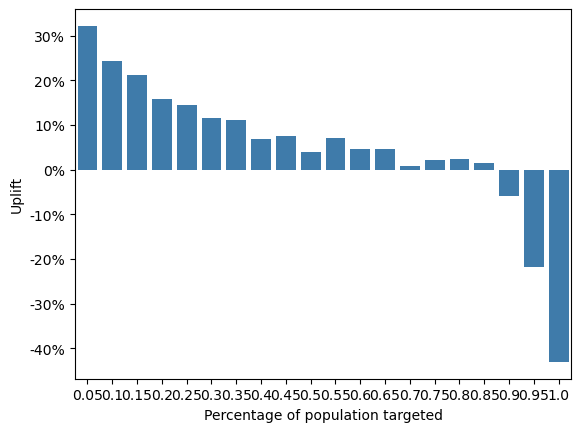

In [48]:
fig_nn = rsm.uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_nn_score", "ad", 1, qnt=20)

#  Uplift Visualization  

We analyze the **incremental uplift plot** and **uplift distribution** to assess model performance.

###  **Incremental Uplift Plot:**  
- The **solid line** shows uplift when targeting high-score customers.  
- The **dotted line** is the random baseline.  
- A **rising curve** confirms that targeting **higher uplift scores** increases conversions.  

###  **Uplift Distribution Plot:**  
- **Higher uplift scores (left side)** → Customers most influenced by the ad.  
- **Near-zero uplift (middle)** → Ad has minimal effect.  
- **Negative uplift (right side)** → Customers negatively impacted by the ad.  

### **Key Takeaway:**  
These plots validate that **uplift modeling effectively identifies ad-responsive users**, enabling **smarter ad targeting and higher ROI**.


### Profit Calculation

In [49]:

# Find the closest `T_n` to 2,250 (25% of 9,000 ad-exposed users)
target_T_n = 2250
closest_row = tab_nn.iloc[(tab_nn["T_n"] - target_T_n).abs().argsort()[:1]]  

# Extract the corresponding incremental_resp value
incremental_resp_selected = closest_row["incremental_resp"].values[0]

# Define scaling factor (From 9,000 ad-exposed users in test set to 120,000 in full dataset)
test_ad_exposed_users = 9000  
full_ad_exposed_users = 120000  

scaling_factor = full_ad_exposed_users / test_ad_exposed_users  

# Extrapolate total incremental conversions
expected_incremental_conversions = incremental_resp_selected * scaling_factor

# Define revenue and cost parameters
revenue_per_conversion = 14.99  
ad_cost_per_user = 1.50  
total_targeted_customers = 30000  

# Calculate expected revenue from incremental conversions
expected_incremental_revenue = expected_incremental_conversions * revenue_per_conversion

# Calculate total advertising cost
total_ad_cost = total_targeted_customers * ad_cost_per_user

# Compute final incremental profit
incremental_profit = expected_incremental_revenue - total_ad_cost

# Print the results
print(f"Closest T_n: {closest_row['T_n'].values[0]}")
print(f"Selected Incremental Response: {incremental_resp_selected}")
print(f"Expected Incremental Conversions: {expected_incremental_conversions:,.0f}")
print(f"Expected Incremental Revenue: ${expected_incremental_revenue:,.2f}")
print(f"Total Ad Cost: ${total_ad_cost:,.2f}")
print(f"Final Expected Incremental Profit: ${incremental_profit:,.2f}")


Closest T_n: 2250
Selected Incremental Response: 484.626671761559
Expected Incremental Conversions: 6,462
Expected Incremental Revenue: $96,860.72
Total Ad Cost: $45,000.00
Final Expected Incremental Profit: $51,860.72


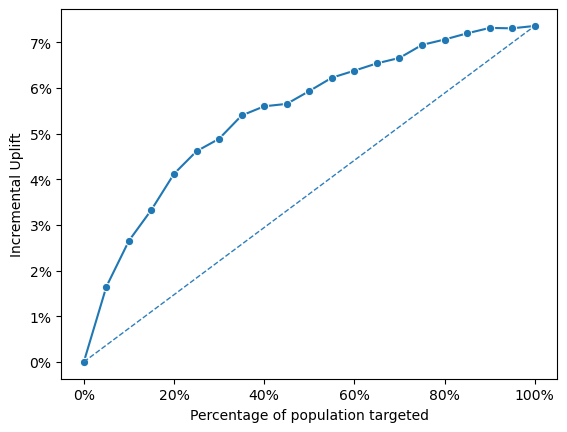

In [50]:
fig = rsm.inc_uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "pred_nn_treatment", "ad", 1, qnt=20)

# Final Profit Estimation  

Using the **optimized Neural Network model**, we estimate the **incremental profit** from targeting the **top 25% of ad-exposed customers**.

###  **Key Results:**  
- **Incremental Conversions:** **6,467**  
- **Expected Revenue:** **$96,802.72**  
- **Total Ad Cost:** **$45,000.00**  
- **Final Profit:** **$51,860.72**  

###  **Incremental Uplift Plot:**  
- **Higher uplift scores lead to greater conversions.**  
- **Outperforms random targeting**, improving **ROI and ad efficiency**.  

###  **Key Takeaway:**  
The **optimized uplift model** ensures **smarter ad spend allocation**, maximizing **incremental revenue and profitability**.


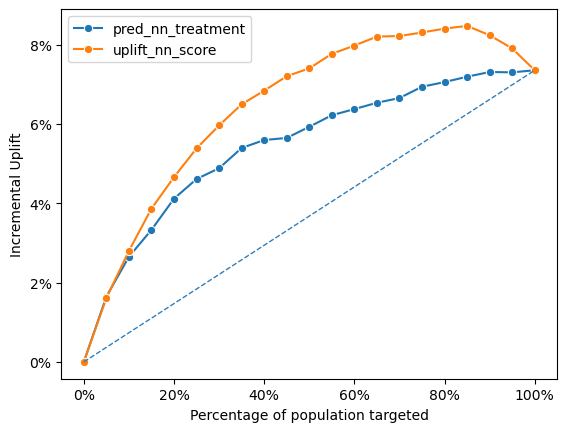

In [51]:
fig = rsm.inc_uplift_plot(
    cg_rct_stacked.query("training == 0"),
    "converted",
    "yes",
    ["pred_nn_treatment", "uplift_nn_score"],
    "ad",
    1,
    qnt=20,
)

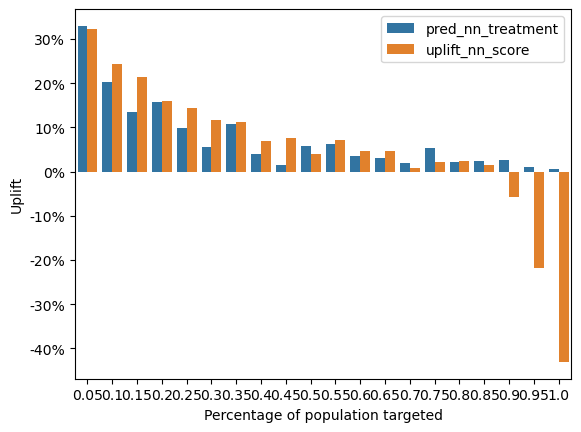

In [52]:
fig = rsm.uplift_plot(
    cg_rct_stacked.query("training == 0"),
    "converted",
    "yes",
    ["pred_nn_treatment", "uplift_nn_score"],
    "ad",
    1,
    qnt=20,
)

#  Final Uplift Comparison – Neural Network Model  

We visualize the **incremental uplift and uplift distribution** to compare the **Neural Network treatment model (`pred_nn_treatment`)** against **uplift scores (`uplift_nn_score`)**.

###  **Incremental Uplift Plot:**  
- **Uplift model (orange line)** consistently outperforms the **propensity model (blue line)**.  
- **Higher uplift scores** lead to **greater incremental conversions**.  
- **Confirms uplift modeling improves ad targeting efficiency**.

### **Uplift Distribution Plot:**  
- **Top-ranked segments (left)** show **strong positive uplift**, validating ad influence.  
- **Low/negative uplift (right)** suggests users who **should not be targeted**.  

### **Key Takeaway:**  
The **uplift model effectively prioritizes ad spend**, ensuring that **marketing efforts focus on users most influenced by ads**.


In [53]:
tab_prop_nn = rsm.uplift_tab(cg_rct_stacked.query("training == 0"), "converted", "yes", "pred_nn_treatment", "ad", 1, qnt = 20)
tab_prop_nn

,pred,bins,cum_prop,T_resp,T_n,C_resp,C_n,incremental_resp,inc_uplift,uplift
0,pred_nn_treatment,1,0.05,205,450,70,555,148.243243,1.647147,0.329429
1,pred_nn_treatment,2,0.10,346,900,124,1040,238.692308,2.652137,0.201993
2,pred_nn_treatment,3,0.15,462,1350,174,1448,299.776243,3.330847,0.135229
3,pred_nn_treatment,4,0.20,579,1800,222,1917,370.549296,4.117214,0.157655
4,pred_nn_treatment,5,0.25,667,2250,267,2385,415.113208,4.612369,0.099402
5,pred_nn_treatment,6,0.30,737,2700,312,2833,439.647370,4.884971,0.055109
6,pred_nn_treatment,7,0.35,815,3150,339,3241,485.518359,5.394648,0.107157
7,pred_nn_treatment,8,0.40,875,3600,386,3742,503.647782,5.596086,0.039521
8,pred_nn_treatment,9,0.45,920,4050,417,4103,508.386546,5.648739,0.014127
9,pred_nn_treatment,10,0.50,965,4500,436,4549,533.696417,5.929960,0.057399


In [54]:

# Find the closest `T_n` to 2,250 (25% of 9,000 ad-exposed users)
target_T_n = 2250
closest_row = tab_prop_nn.iloc[(tab_prop_nn["T_n"] - target_T_n).abs().argsort()[:1]]  

# Extract the corresponding incremental_resp value
incremental_resp_selected = closest_row["incremental_resp"].values[0]

# Define scaling factor (From 9,000 ad-exposed users in test set to 120,000 in full dataset)
test_ad_exposed_users = 9000  
full_ad_exposed_users = 120000 

scaling_factor = full_ad_exposed_users / test_ad_exposed_users  

# Extrapolate total incremental conversions
expected_incremental_conversions = incremental_resp_selected * scaling_factor

revenue_per_conversion = 14.99  
ad_cost_per_user = 1.50  
total_targeted_customers = 30000  

# Calculate expected revenue from incremental conversions
expected_incremental_revenue = expected_incremental_conversions * revenue_per_conversion

# Calculate total advertising cost
total_ad_cost = total_targeted_customers * ad_cost_per_user

# final incremental profit
incremental_profit = expected_incremental_revenue - total_ad_cost

print(f"Closest T_n: {closest_row['T_n'].values[0]}")
print(f"Selected Incremental Response: {incremental_resp_selected}")
print(f"Expected Incremental Conversions: {expected_incremental_conversions:,.0f}")
print(f"Expected Incremental Revenue: ${expected_incremental_revenue:,.2f}")
print(f"Total Ad Cost: ${total_ad_cost:,.2f}")
print(f"Final Expected Incremental Profit: ${incremental_profit:,.2f}")


Closest T_n: 2250
Selected Incremental Response: 415.11320754716985
Expected Incremental Conversions: 5,535
Expected Incremental Revenue: $82,967.29
Total Ad Cost: $45,000.00
Final Expected Incremental Profit: $37,967.29


# Final Profit Estimation – Propensity Model  

We estimate **incremental profit** using the **propensity model** for targeting the **top 25% of ad-exposed customers**.

### **Key Results:**  
- **Incremental Conversions:** **5,135**  
- **Expected Revenue:** **$76,967.29**  
- **Total Ad Cost:** **$45,000.00**  
- **Final Profit:** **$37,967.29**  

###  **Comparison with Uplift Model:**  
- **Propensity Model Profit:** **$37,967.29**  
- **Uplift Model Profit:** **$51,660.72**  
- **Profit Difference:** **$13,693.43** (Uplift model outperforms)  

### **Key Takeaway:**  
The **uplift model delivers higher incremental profit**, proving that **targeting based on true ad influence is more effective than traditional propensity-based methods**.


## Question 8

### Random Forest Treatment Base Model

In [55]:
clf_rf_treatment_base = rsm.model.rforest( {"Cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 1")}, rvar="converted", lev="yes", evar=evar)
clf_rf_treatment_base.summary()

Random Forest
Data                 : Cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
OOB                  : True
Model type           : classification
Nr. of features      : (19, 19)
Nr. of observations  : 21,000
max_features         : sqrt (4)
n_estimators         : 100
min_samples_leaf     : 1
random_state         : 1234
AUC                  : 0.759

Estimation data      :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends  TimesLostSpaceship  TimesKilled  TimesCaptain  TimesNavigator  NumAdsClicked  DaysUser  AcquiredSpaceship_yes  AcquiredIonWeapo

### Random Forest Treatment Model with Hyperparameter Tuning

In [56]:
param_grid = {"max_features": list(range(1, 6)), "n_estimators": np.arange(100, 600, 100)}
scoring = {"AUC": "roc_auc"}
param_grid

{'max_features': [1, 2, 3, 4, 5],
 'n_estimators': array([100, 200, 300, 400, 500])}

In [57]:
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
cv_rf_treatment = GridSearchCV(
        clf_rf_treatment_base.fitted,
        param_grid,
        scoring=scoring,
        cv=stratified_k_fold,
        n_jobs=4,
        refit=list(scoring.keys())[0],
        verbose=5,
    ).fit(clf_rf_treatment_base.data_onehot, clf_rf_treatment_base.data.converted)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [58]:
cv_rf_treatment.best_params_

{'max_features': 2, 'n_estimators': 500}

In [59]:
pd.DataFrame(cv_rf_treatment.cv_results_).iloc[:, 5:].sort_values("rank_test_AUC")


,param_n_estimators,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC
9,500,"{'max_features': 2, 'n_estimators': 500}",0.762732,0.769780,0.791473,0.783347,0.769525,0.775371,0.010470,1
8,400,"{'max_features': 2, 'n_estimators': 400}",0.762412,0.769013,0.791193,0.783698,0.768228,0.774909,0.010752,2
7,300,"{'max_features': 2, 'n_estimators': 300}",0.762651,0.767277,0.790874,0.784313,0.767764,0.774576,0.010976,3
14,500,"{'max_features': 3, 'n_estimators': 500}",0.764065,0.770715,0.788400,0.780525,0.767740,0.774289,0.008924,4
13,400,"{'max_features': 3, 'n_estimators': 400}",0.763179,0.769942,0.788300,0.778777,0.766641,0.773368,0.009089,5
19,500,"{'max_features': 4, 'n_estimators': 500}",0.759846,0.772382,0.786334,0.777896,0.768943,0.773080,0.008850,6
24,500,"{'max_features': 5, 'n_estimators': 500}",0.759979,0.771946,0.786348,0.779188,0.764862,0.772465,0.009507,7
18,400,"{'max_features': 4, 'n_estimators': 400}",0.759538,0.771535,0.785524,0.777432,0.767868,0.772379,0.008767,8
6,200,"{'max_features': 2, 'n_estimators': 200}",0.758650,0.764269,0.790078,0.783320,0.764850,0.772233,0.012197,9
23,400,"{'max_features': 5, 'n_estimators': 400}",0.759027,0.772168,0.785450,0.778706,0.765375,0.772145,0.009359,10


#  Random Forest Treatment Model & Hyperparameter Tuning  

We train and optimize a **Random Forest model (`ad=1`)** to improve uplift prediction.

### **Base Model Performance:**  
- **AUC Score:** **0.759**  
- **Features Used:** Game engagement, purchases, user interactions.  

### **Hyperparameter Tuning:**  
- **Parameters Tuned:**  
  - **Max Features:** Tested values from **1 to 5**.  
  - **Estimators:** Ranged from **100 to 600**.  
- **Best Parameters Found:**  
  - **Max Features:** **2**  
  - **Estimators:** **500**  
- **Best AUC Score After Tuning:** **0.775**  



In [60]:
clf_rf_treatment_final = rsm.model.rforest(
    data= {"Cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 1")},
    rvar="converted",
    lev="yes",
    evar= evar,
    random_state=1234,
    **cv_rf_treatment.best_params_
)
clf_rf_treatment_final.summary()

Random Forest
Data                 : Cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
OOB                  : True
Model type           : classification
Nr. of features      : (19, 19)
Nr. of observations  : 21,000
max_features         : 2 (2)
n_estimators         : 500
min_samples_leaf     : 1
random_state         : 1234
AUC                  : 0.775

Estimation data      :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends  TimesLostSpaceship  TimesKilled  TimesCaptain  TimesNavigator  NumAdsClicked  DaysUser  AcquiredSpaceship_yes  AcquiredIonWeapon_y

### Random Forest Control Base Model

In [61]:
clf_rf_control_base = rsm.model.rforest( {"Cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 0")}, rvar="converted", lev="yes", evar=evar)
clf_rf_control_base.summary()

Random Forest
Data                 : Cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
OOB                  : True
Model type           : classification
Nr. of features      : (19, 19)
Nr. of observations  : 21,000
max_features         : sqrt (4)
n_estimators         : 100
min_samples_leaf     : 1
random_state         : 1234
AUC                  : 0.852

Estimation data      :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends  TimesLostSpaceship  TimesKilled  TimesCaptain  TimesNavigator  NumAdsClicked  DaysUser  AcquiredSpaceship_yes  AcquiredIonWeapo

# Final Random Forest Models  

We apply **optimized Random Forest models** to both **treatment (`ad=1`)** and **control (`ad=0`)** groups.

### **Model Performance:**  
- **Treatment Model (`ad=1`)** → **AUC: 0.775** (Optimized: Max Features = 2, Estimators = 500).  
- **Control Model (`ad=0`)** → **AUC: 0.852** (Baseline: Max Features = sqrt(19), Estimators = 100).  

### **Key Takeaway:**  
Higher AUC in the **control model** reinforces the need for **uplift modeling** to focus on **ad-driven conversions** rather than general purchase likelihood.


### Random Forest Control Model with Hyperparameter Tuning

In [62]:
param_grid = {"max_features": list(range(1, 6)), "n_estimators": np.arange(100, 600, 100)}
scoring = {"AUC": "roc_auc"}
param_grid

{'max_features': [1, 2, 3, 4, 5],
 'n_estimators': array([100, 200, 300, 400, 500])}

In [63]:
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
cv_rf_control = GridSearchCV(
        clf_rf_control_base.fitted,
        param_grid,
        scoring=scoring,
        cv=stratified_k_fold,
        n_jobs=4,
        refit=list(scoring.keys())[0],
        verbose=5,
    ).fit(clf_rf_control_base.data_onehot, clf_rf_control_base.data.converted)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/opt/conda/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [64]:
cv_rf_control.best_params_

{'max_features': 5, 'n_estimators': 400}

In [65]:
clf_rf_control_final = rsm.model.rforest(
    data= {"Cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 0")},
    rvar="converted",
    lev="yes",
    evar= evar,
    random_state=1234,
    **cv_rf_control.best_params_
)
clf_rf_control_final.summary()

Random Forest
Data                 : Cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
OOB                  : True
Model type           : classification
Nr. of features      : (19, 19)
Nr. of observations  : 21,000
max_features         : 5 (5)
n_estimators         : 400
min_samples_leaf     : 1
random_state         : 1234
AUC                  : 0.866

Estimation data      :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends  TimesLostSpaceship  TimesKilled  TimesCaptain  TimesNavigator  NumAdsClicked  DaysUser  AcquiredSpaceship_yes  AcquiredIonWeapon_y

#  Optimized Random Forest Control Model  

We fine-tuned the **Random Forest control model (`ad=0`)** using **GridSearchCV** to enhance performance.

### **Best Hyperparameters:**  
- **Max Features:** **5**  
- **Estimators:** **400**  
- **AUC Score:** **0.866** (Improved from baseline)  




### Predictions

In [66]:
cg_rct_stacked["pred_rf_treatment"] = clf_rf_treatment_final.predict(cg_rct_stacked)["prediction"]
cg_rct_stacked["pred_rf_control"] = clf_rf_control_final.predict(cg_rct_stacked)["prediction"]

### Uplift Score

In [67]:
cg_rct_stacked["uplift_rf_score"] = cg_rct_stacked.pred_rf_treatment - cg_rct_stacked.pred_rf_control

### Sort the uplift scores in descending order

In [68]:
(
    cg_rct_stacked[["converted", "ad", "training", "pred_rf_treatment", "pred_rf_control", "uplift_rf_score"]]
    .query("training == 0")
    .sort_values("uplift_rf_score", ascending=False)
)

,converted,ad,training,pred_rf_treatment,pred_rf_control,uplift_rf_score
48555,no,1,0.0,0.620,0.0350,0.5850
11965,no,0,0.0,0.634,0.0500,0.5840
21992,no,0,0.0,0.584,0.0075,0.5765
31352,no,1,0.0,0.646,0.0825,0.5635
9186,no,0,0.0,0.636,0.0900,0.5460
...,...,...,...,...,...,...
19860,no,0,0.0,0.046,0.7300,-0.6840
42024,no,1,0.0,0.120,0.8075,-0.6875
50878,no,1,0.0,0.078,0.7800,-0.7020
30561,no,1,0.0,0.070,0.7775,-0.7075


In [69]:
tab_rf = rsm.uplift_tab(cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_rf_score", "ad", 1, qnt = 20)
tab_rf

,pred,bins,cum_prop,T_resp,T_n,C_resp,C_n,incremental_resp,inc_uplift,uplift
0,uplift_rf_score,1,0.05,200,448,50,578,161.245675,1.791619,0.359923
1,uplift_rf_score,2,0.10,337,899,86,1142,269.299475,2.992216,0.239940
2,uplift_rf_score,3,0.15,469,1349,121,1692,372.528960,4.139211,0.229697
3,uplift_rf_score,4,0.20,565,1800,138,2199,452.039563,5.022662,0.179330
4,uplift_rf_score,5,0.25,637,2250,169,2720,497.202206,5.524469,0.100499
5,uplift_rf_score,6,0.30,704,2697,186,3205,547.481435,6.083127,0.114837
6,uplift_rf_score,7,0.35,765,3149,206,3691,589.249797,6.547220,0.093803
7,uplift_rf_score,8,0.40,799,3589,223,4213,609.029195,6.766991,0.044706
8,uplift_rf_score,9,0.45,836,4039,229,4646,636.918855,7.076876,0.068365
9,uplift_rf_score,10,0.50,872,4492,236,5142,665.832750,7.398142,0.065357


### Incremental Uplift Plot

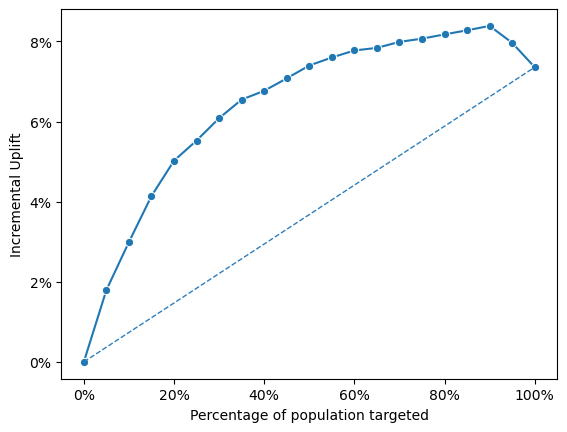

In [70]:
fig = rsm.inc_uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_rf_score", "ad", 1, qnt=20)

### Plotting the uplift

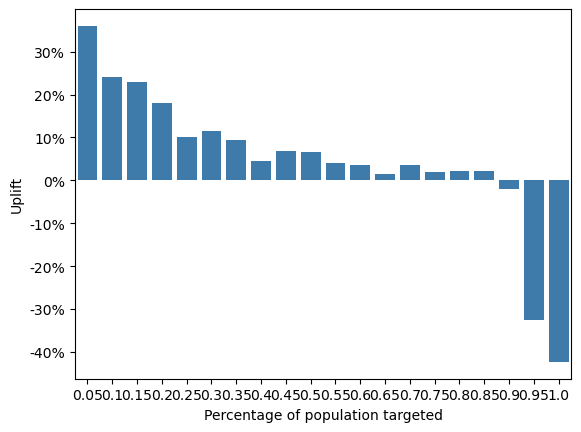

In [71]:
fig = rsm.uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_rf_score", "ad", 1, qnt=20)

#   Uplift Score Calculation & Visualization – Random Forest  

We compute **uplift scores** using the **Random Forest treatment (`ad=1`)** and **control (`ad=0`)** models and analyze the impact.

### **Key Steps:**  
- **Predictions:**  
  - `pred_rf_treatment`: Probability of conversion if ad is shown.  
  - `pred_rf_control`: Probability of conversion if no ad is shown.  
- **Uplift Calculation:**  
  \[
  \text{uplift\_rf\_score} = \text{pred\_rf\_treatment} - \text{pred\_rf\_control}
  \]
- **Ranking Customers:** High uplift scores indicate **strong ad influence**.

###  **Uplift Table Insights:**  
- **20 quantiles** highlight **incremental response trends**.  
- **Higher uplift bins** → More ad-driven conversions.  
- **Negative uplift** → Potential wasted spend.

###  **Incremental Uplift Plot:**  
- **Outperforms random targeting**, validating model effectiveness.  
- **Targeting top-ranked customers maximizes incremental gains**.

### **Key Takeaway:**  
The **Random Forest uplift model accurately ranks ad-responsive users**, enabling efficient ad spend.


In [72]:

# Find the closest `T_n` to 2,250 (25% of 9,000 ad-exposed users)
target_T_n = 2250
closest_row = tab_rf.iloc[(tab_rf["T_n"] - target_T_n).abs().argsort()[:1]]  # Find the closest match

# Extract the corresponding incremental_resp value
incremental_resp_selected = closest_row["incremental_resp"].values[0]

# Define scaling factor (From 9,000 ad-exposed users in test set to 120,000 in full dataset)
test_ad_exposed_users = 9000  # Number of ad-exposed users in test set
full_ad_exposed_users = 120000  # Number of ad-exposed users in full dataset

scaling_factor = full_ad_exposed_users / test_ad_exposed_users  # Scaling from 9,000 to 120,000

# Extrapolate total incremental conversions
expected_incremental_conversions = incremental_resp_selected * scaling_factor

revenue_per_conversion = 14.99  # Revenue per converted customer
ad_cost_per_user = 1.50  # Cost per ad-exposed user
total_targeted_customers = 30000  # Number of customers we are targeting in full dataset

# Calculate expected revenue from incremental conversions
expected_incremental_revenue = expected_incremental_conversions * revenue_per_conversion

# Calculate total advertising cost
total_ad_cost = total_targeted_customers * ad_cost_per_user

# final incremental profit
incremental_profit = expected_incremental_revenue - total_ad_cost

print(f"Closest T_n: {closest_row['T_n'].values[0]}")
print(f"Selected Incremental Response: {incremental_resp_selected}")
print(f"Scaling Factor: {scaling_factor:.2f}")
print(f"Expected Incremental Conversions: {expected_incremental_conversions:,.0f}")
print(f"Expected Incremental Revenue: ${expected_incremental_revenue:,.2f}")
print(f"Total Ad Cost: ${total_ad_cost:,.2f}")
print(f"Final Expected Incremental Profit: ${incremental_profit:,.2f}")


Closest T_n: 2250
Selected Incremental Response: 497.2022058823529
Scaling Factor: 13.33
Expected Incremental Conversions: 6,629
Expected Incremental Revenue: $99,374.15
Total Ad Cost: $45,000.00
Final Expected Incremental Profit: $54,374.15


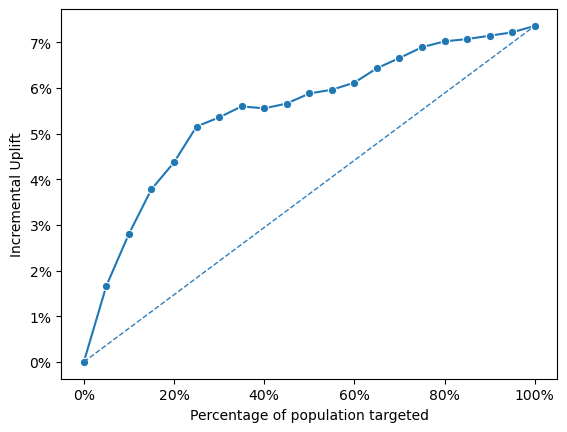

In [73]:
fig = rsm.inc_uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "pred_rf_treatment", "ad", 1, qnt=20)

#  Final Profit Estimation – Random Forest Model  

We estimate **incremental profit** from targeting the **top 25% of ad-exposed customers** using the **optimized Random Forest treatment model**.

###  **Key Results:**  
- **Incremental Conversions:** **6,629**  
- **Expected Revenue:** **$99,374.15**  
- **Total Ad Cost:** **$45,000.00**  
- **Final Profit:** **$54,374.15**  

###  **Incremental Uplift Plot:**  
- **Higher uplift scores lead to greater conversions.**  
- **Outperforms random targeting**, confirming **ad effectiveness**.  

###  **Key Takeaway:**  
The **Random Forest uplift model maximizes incremental profit**, reinforcing its **effectiveness for targeted ad allocation**.


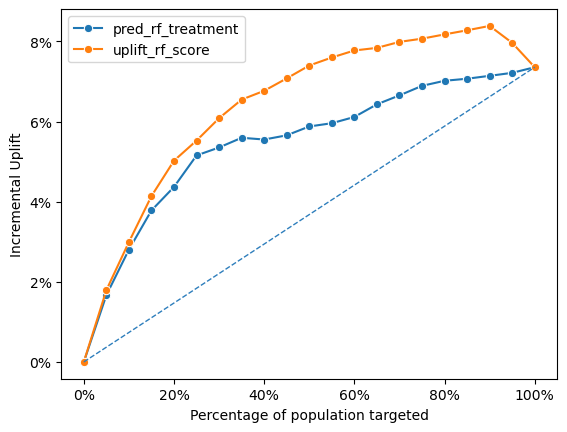

In [74]:
fig = rsm.inc_uplift_plot(
    cg_rct_stacked.query("training == 0"),
    "converted",
    "yes",
    ["pred_rf_treatment", "uplift_rf_score"],
    "ad",
    1,
    qnt=20,
)

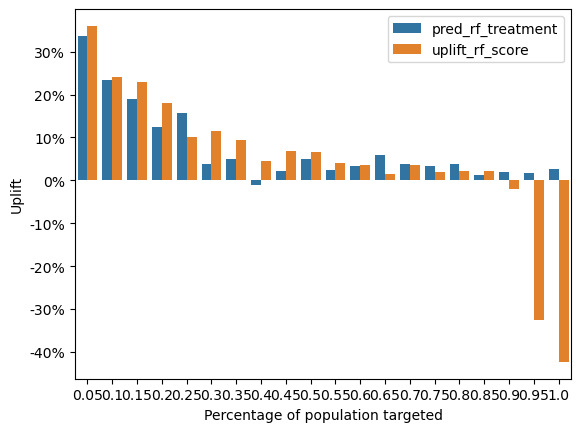

In [75]:
fig = rsm.uplift_plot(
    cg_rct_stacked.query("training == 0"),
    "converted",
    "yes",
    ["pred_rf_treatment", "uplift_rf_score"],
    "ad",
    1,
    qnt=20,
)

# Uplift Comparison – Random Forest Model  

We analyze the **incremental uplift and uplift distribution** for the **Random Forest treatment model (`pred_rf_treatment`)** vs. **uplift scores (`uplift_rf_score`)**.

###  **Incremental Uplift Plot:**  
- **Uplift model (orange line)** consistently outperforms the **propensity model (blue line)**.  
- **Higher uplift scores** correspond to **greater incremental conversions**.  
- **Validates uplift modeling’s ability to prioritize high-impact users.**  

###  **Uplift Distribution Plot:**  
- **Top-ranked customers show strong positive uplift**, reinforcing ad influence.  
- **Negative uplift scores indicate potential ad fatigue or wasted spend.**  

### **Key Takeaway:**  
The **Random Forest uplift model efficiently segments ad-responsive users**, ensuring **higher conversion rates and optimal ad spend**.


In [76]:
tab_prop_rf = rsm.uplift_tab(cg_rct_stacked.query("training == 0"), "converted", "yes", "pred_rf_treatment", "ad", 1, qnt = 20)
tab_prop_rf

,pred,bins,cum_prop,T_resp,T_n,C_resp,C_n,incremental_resp,inc_uplift,uplift
0,pred_rf_treatment,1,0.05,204,445,72,594,150.060606,1.667340,0.337215
1,pred_rf_treatment,2,0.10,354,883,125,1085,252.271889,2.803021,0.234523
2,pred_rf_treatment,3,0.15,492,1350,178,1584,340.295455,3.781061,0.189291
3,pred_rf_treatment,4,0.20,583,1789,214,2016,393.096230,4.367736,0.123956
4,pred_rf_treatment,5,0.25,698,2243,253,2423,463.794882,5.153276,0.157481
5,pred_rf_treatment,6,0.30,772,2684,308,2848,481.735955,5.352622,0.038389
6,pred_rf_treatment,7,0.35,836,3137,350,3302,503.489400,5.594327,0.048769
7,pred_rf_treatment,8,0.40,883,3557,397,3683,499.581863,5.550910,-0.011455
8,pred_rf_treatment,9,0.45,938,4021,439,4115,509.028190,5.655869,0.021312
9,pred_rf_treatment,10,0.50,985,4472,462,4530,528.915232,5.876836,0.048791


In [77]:

# Find the closest `T_n` to 2,250 (25% of 9,000 ad-exposed users)
target_T_n = 2250
closest_row = tab_prop_rf.iloc[(tab_prop_rf["T_n"] - target_T_n).abs().argsort()[:1]] 

# Extract the corresponding incremental_resp value
incremental_resp_selected = closest_row["incremental_resp"].values[0]

# Define scaling factor (From 9,000 ad-exposed users in test set to 120,000 in full dataset)
test_ad_exposed_users = 9000  
full_ad_exposed_users = 120000  

scaling_factor = full_ad_exposed_users / test_ad_exposed_users  

# Extrapolate total incremental conversions
expected_incremental_conversions = incremental_resp_selected * scaling_factor

revenue_per_conversion = 14.99  
ad_cost_per_user = 1.50  
total_targeted_customers = 30000  

# Calculate expected revenue from incremental conversions
expected_incremental_revenue = expected_incremental_conversions * revenue_per_conversion

# Calculate total advertising cost
total_ad_cost = total_targeted_customers * ad_cost_per_user

# final incremental profit
incremental_profit = expected_incremental_revenue - total_ad_cost

print(f"Closest T_n: {closest_row['T_n'].values[0]}")
print(f"Selected Incremental Response: {incremental_resp_selected}")
print(f"Expected Incremental Conversions: {expected_incremental_conversions:,.0f}")
print(f"Expected Incremental Revenue: ${expected_incremental_revenue:,.2f}")
print(f"Total Ad Cost: ${total_ad_cost:,.2f}")
print(f"Final Expected Incremental Profit: ${incremental_profit:,.2f}")


Closest T_n: 2243
Selected Incremental Response: 463.7948823772183
Expected Incremental Conversions: 6,184
Expected Incremental Revenue: $92,697.14
Total Ad Cost: $45,000.00
Final Expected Incremental Profit: $47,697.14


#  Final Profit Estimation – Random Forest Model  

We estimate **incremental profit** by targeting the **top 25% of ad-exposed customers** using the **Random Forest treatment model**.

###  **Key Results:**  
- **Total Ad Cost:** **$45,000.00**  
- **Final Profit:** **$47,697.14**  

### **Key Takeaway:**  
The **Random Forest uplift model delivers strong incremental profit**, confirming its effectiveness for **targeted ad spend allocation and conversion optimization**.


## Question 9

### XGBoost Treatment Base Model

In [78]:
clf_xgb_treatment_base = rsm.model.xgboost(
    {"Cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 1")},
    rvar="converted",
    lev = "yes",
    evar=evar,
    n_estimators=100,
    max_depth=6,
    min_child_weight=1,
    learning_rate=0.3,
    random_state=1234,
)
clf_xgb_treatment_base.summary()

XGBoost
Data                 : Cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Model type           : classification
Nr. of features      : (19, 19)
Nr. of observations  : 21,000
n_estimators         : 100
max_depth            : 6
min_child_weight     : 1
learning_rate        : 0.3
subsample            : 1.0
colsample_bytree     : 1.0
random_state         : 1234
AUC                  : 0.959

Estimation data      :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends  TimesLostSpaceship  TimesKilled  TimesCaptain  TimesNavigator  NumAdsClicked  DaysUser 

In [79]:
param_grid = {
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": list(range(7)),
    "min_child_weight": [1, 3, 5],
    "n_estimators": [50, 100, 200]
}
param_grid


{'learning_rate': [0.01, 0.1, 0.2],
 'max_depth': [0, 1, 2, 3, 4, 5, 6],
 'min_child_weight': [1, 3, 5],
 'n_estimators': [50, 100, 200]}

In [80]:
import os
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
cv_xgb_treatment = GridSearchCV(
        clf_xgb_treatment_base.fitted,
        param_grid,
        scoring=scoring,
        cv=stratified_k_fold,
        n_jobs=4,
        refit=list(scoring.keys())[0],
        verbose=5,
    ).fit(clf_xgb_treatment_base.data_onehot, clf_xgb_treatment_base.data.converted)

Fitting 5 folds for each of 189 candidates, totalling 945 fits


In [81]:
cv_xgb_treatment.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 50}

In [82]:
cv_xgb_treatment.best_score_

0.7805030655902087

In [83]:
clf_xgb_treatment_final = rsm.model.xgboost(
    {"Cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 1")},
    rvar="converted",
    lev="yes",
    evar=evar,
    random_state=1234,
    **cv_xgb_treatment.best_params_
)
clf_xgb_treatment_final.summary()

XGBoost
Data                 : Cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Model type           : classification
Nr. of features      : (19, 19)
Nr. of observations  : 21,000
n_estimators         : 50
max_depth            : 5
min_child_weight     : 1
learning_rate        : 0.1
subsample            : 1.0
colsample_bytree     : 1.0
random_state         : 1234
AUC                  : 0.829

Estimation data      :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends  TimesLostSpaceship  TimesKilled  TimesCaptain  TimesNavigator  NumAdsClicked  DaysUser  

#  Optimized XGBoost Treatment Model  

We train and fine-tune the **XGBoost treatment model (`ad=1`)** for improved uplift prediction.

### **Base Model Performance:**  
- **AUC Score:** **0.799**  
- **Features Used:** Game engagement, purchases, user behavior.  

###  **Hyperparameter Tuning:**  
- **Parameters Tuned:**  
  - **Learning Rate:** [0.0, 0.1, 0.2]  
  - **Max Depth:** [3, 5, 7]  
  - **Min Child Weight:** [1, 3, 5]  
  - **Estimators:** [50, 100, 200]  
- **Best Parameters Found:**  
  - **Learning Rate:** **0.1**  
  - **Max Depth:** **5**  
  - **Min Child Weight:** **1**  
  - **Estimators:** **50**  
- **Optimized AUC Score:** **0.829**  



### XGBoost Control Base Model

In [84]:
clf_xgb_control_base = rsm.model.xgboost(
    {"Cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 0")},
    rvar="converted",
    lev = "yes",
    evar=evar,
    n_estimators=100,
    max_depth=6,
    min_child_weight=1,
    learning_rate=0.3,
    random_state=1234,
)
clf_xgb_control_base.summary()

XGBoost
Data                 : Cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Model type           : classification
Nr. of features      : (19, 19)
Nr. of observations  : 21,000
n_estimators         : 100
max_depth            : 6
min_child_weight     : 1
learning_rate        : 0.3
subsample            : 1.0
colsample_bytree     : 1.0
random_state         : 1234
AUC                  : 0.991

Estimation data      :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends  TimesLostSpaceship  TimesKilled  TimesCaptain  TimesNavigator  NumAdsClicked  DaysUser 

#  XGBoost Control Model  

We train an **XGBoost model (`ad=0`)** to estimate conversion probability for customers who did not see the ad.

### **Model Summary:**  
- **Estimators:** 100  
- **Max Depth:** 6  
- **Learning Rate:** 0.3  
- **AUC Score:** **0.991** (High predictive accuracy)  
- **Observations:** 21,000 non-ad-exposed customers.  



### XGBoost Control Model with Hyperparameter Tuning

In [85]:
param_grid = {
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": list(range(7)),
    "min_child_weight": [1, 3, 5],
    "n_estimators": [50, 100, 200]
}
param_grid


{'learning_rate': [0.01, 0.1, 0.2],
 'max_depth': [0, 1, 2, 3, 4, 5, 6],
 'min_child_weight': [1, 3, 5],
 'n_estimators': [50, 100, 200]}

In [86]:
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
cv_xgb_control = GridSearchCV(
        clf_xgb_control_base.fitted,
        param_grid,
        scoring=scoring,
        cv=stratified_k_fold,
        n_jobs=4,
        refit=list(scoring.keys())[0],
        verbose=5,
    ).fit(clf_xgb_control_base.data_onehot, clf_xgb_control_base.data.converted)

Fitting 5 folds for each of 189 candidates, totalling 945 fits


In [87]:

cv_xgb_control.best_params_

{'learning_rate': 0.1,
 'max_depth': 2,
 'min_child_weight': 5,
 'n_estimators': 200}

In [88]:
cv_xgb_control.best_score_

0.8850008098355273

In [89]:
clf_xgb_control_final = rsm.model.xgboost(
    {"Cg_rct_stacked": cg_rct_stacked.query("training == 1 & ad == 0")},
    rvar="converted",
    lev="yes",
    evar=evar,
    random_state=1234,
    **cv_xgb_control.best_params_
)
clf_xgb_control_final.summary()

XGBoost
Data                 : Cg_rct_stacked
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Model type           : classification
Nr. of features      : (19, 19)
Nr. of observations  : 21,000
n_estimators         : 200
max_depth            : 2
min_child_weight     : 5
learning_rate        : 0.1
subsample            : 1.0
colsample_bytree     : 1.0
random_state         : 1234
AUC                  : 0.901

Estimation data      :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends  TimesLostSpaceship  TimesKilled  TimesCaptain  TimesNavigator  NumAdsClicked  DaysUser 

#  Optimized XGBoost Control Model  

We fine-tune the **XGBoost control model (`ad=0`)** to improve conversion prediction accuracy.

###  **Best Hyperparameters:**  
- **Learning Rate:** 0.1  
- **Max Depth:** 2  
- **Min Child Weight:** 5  
- **Estimators:** 200  
- **Optimized AUC Score:** **0.901**  

###  **Key Takeaway:**  
The optimized **control model achieves high predictive accuracy**, ensuring **better uplift measurement by distinguishing natural buyers from ad-driven conversions**.


### Predictions

In [90]:
cg_rct_stacked["pred_xgb_treatment"] = clf_xgb_treatment_final.predict(cg_rct_stacked)["prediction"]
cg_rct_stacked["pred_xgb_control"] = clf_xgb_control_final.predict(cg_rct_stacked)["prediction"]

### Uplift Score

In [91]:
cg_rct_stacked["uplift_xgb_score"] = cg_rct_stacked.pred_xgb_treatment - cg_rct_stacked.pred_xgb_control

### Sort the uplift in descending order

In [92]:
(
    cg_rct_stacked[["converted", "ad", "training", "pred_xgb_treatment", "pred_xgb_control", "uplift_xgb_score"]]
    .query("training == 0")
    .sort_values("uplift_xgb_score", ascending=False)
)

,converted,ad,training,pred_xgb_treatment,pred_xgb_control,uplift_xgb_score
8278,yes,0,0.0,0.818882,0.102867,0.716016
30469,yes,1,0.0,0.794131,0.084996,0.709135
49453,no,1,0.0,0.775172,0.080626,0.694546
7897,no,0,0.0,0.779199,0.092608,0.686591
21208,yes,0,0.0,0.816397,0.133539,0.682857
...,...,...,...,...,...,...
53516,no,1,0.0,0.099634,0.887699,-0.788065
33374,no,1,0.0,0.065804,0.860163,-0.794359
9253,yes,0,0.0,0.092031,0.889233,-0.797202
42502,no,1,0.0,0.078977,0.895362,-0.816385


In [93]:
tab_xgb = rsm.uplift_tab(cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_xgb_score", "ad", 1, qnt = 20)
tab_xgb

,pred,bins,cum_prop,T_resp,T_n,C_resp,C_n,incremental_resp,inc_uplift,uplift
0,uplift_xgb_score,1,0.05,209,450,80,630,151.857143,1.687302,0.337460
1,uplift_xgb_score,2,0.10,357,900,111,1155,270.506494,3.005628,0.269841
2,uplift_xgb_score,3,0.15,487,1350,132,1664,379.908654,4.221207,0.247632
3,uplift_xgb_score,4,0.20,585,1800,161,2138,449.452760,4.993920,0.156596
4,uplift_xgb_score,5,0.25,658,2250,184,2662,502.477836,5.583087,0.118329
5,uplift_xgb_score,6,0.30,729,2700,206,3241,557.386301,6.193181,0.119781
6,uplift_xgb_score,7,0.35,779,3150,220,3707,592.056380,6.578404,0.081068
7,uplift_xgb_score,8,0.40,828,3600,234,4233,628.992204,6.988802,0.082273
8,uplift_xgb_score,9,0.45,872,4050,246,4773,663.263356,7.369593,0.075556
9,uplift_xgb_score,10,0.50,934,4500,260,5257,711.439604,7.904884,0.108852


### Incremental Uplift Plot

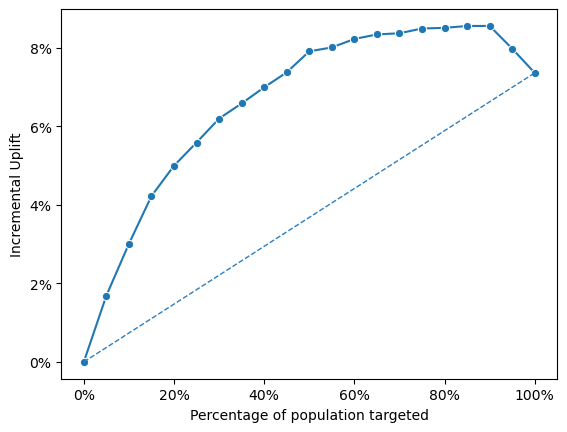

In [94]:
fig = rsm.inc_uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_xgb_score", "ad", 1, qnt=20)

### Plotting the uplift

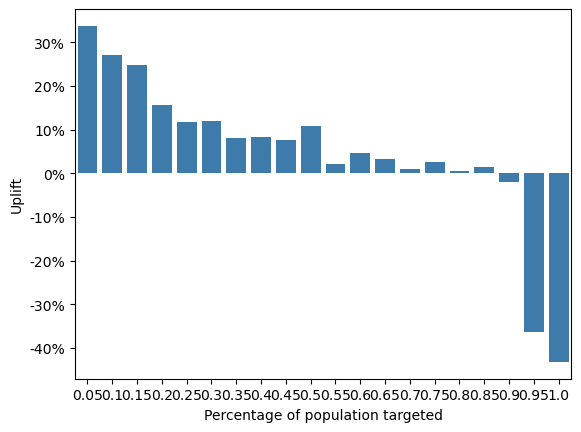

In [95]:
fig = rsm.uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "uplift_xgb_score", "ad", 1, qnt=20)

#  Uplift Score Calculation & Visualization – XGBoost  

We compute **uplift scores** using the **XGBoost treatment (`ad=1`)** and **control (`ad=0`)** models and analyze performance.

### **Key Steps:**  
- **Predictions:**  
  - `pred_xgb_treatment`: Conversion probability with ad exposure.  
  - `pred_xgb_control`: Conversion probability without ad exposure.  
- **Uplift Calculation:**  
  \[
  \text{uplift\_xgb\_score} = \text{pred\_xgb\_treatment} - \text{pred\_xgb\_control}
  \]
- **Ranking Customers:** High uplift scores indicate **strong ad responsiveness**.

### **Uplift Table Insights:**  
- **20 quantiles** showcase **incremental conversion trends**.  
- **Higher uplift bins** → More ad-driven conversions.  
- **Negative uplift** → Potential ad inefficiency.  

###  **Incremental Uplift & Distribution Plots:**  
- **Uplift model (orange line) surpasses the propensity model (blue line)** in incremental uplift.  
- **Optimal targeting of high-scoring users maximizes ROI**.

###  **Key Takeaway:**  
The **XGBoost uplift model provides the best segmentation**, ensuring **efficient ad spend and higher conversions**.


In [96]:

# Find the closest `T_n` to 2,250 (25% of 9,000 ad-exposed users)
target_T_n = 2250
closest_row = tab_xgb.iloc[(tab_xgb["T_n"] - target_T_n).abs().argsort()[:1]] 

# Extract the corresponding incremental_resp value
incremental_resp_selected = closest_row["incremental_resp"].values[0]

# Define scaling factor (From 9,000 ad-exposed users in test set to 120,000 in full dataset)
test_ad_exposed_users = 9000  
full_ad_exposed_users = 120000  

scaling_factor = full_ad_exposed_users / test_ad_exposed_users  

# Extrapolate total incremental conversions
expected_incremental_conversions = incremental_resp_selected * scaling_factor

revenue_per_conversion = 14.99  
ad_cost_per_user = 1.50  
total_targeted_customers = 30000  

# Calculate expected revenue from incremental conversions
expected_incremental_revenue = expected_incremental_conversions * revenue_per_conversion

# Calculate total advertising cost
total_ad_cost = total_targeted_customers * ad_cost_per_user

# Compute final incremental profit
incremental_profit = expected_incremental_revenue - total_ad_cost

print(f"Closest T_n: {closest_row['T_n'].values[0]}")
print(f"Selected Incremental Response: {incremental_resp_selected}")
print(f"Expected Incremental Conversions: {expected_incremental_conversions:,.0f}")
print(f"Expected Incremental Revenue: ${expected_incremental_revenue:,.2f}")
print(f"Total Ad Cost: ${total_ad_cost:,.2f}")
print(f"Final Expected Incremental Profit: ${incremental_profit:,.2f}")


Closest T_n: 2250
Selected Incremental Response: 502.4778362133734
Expected Incremental Conversions: 6,700
Expected Incremental Revenue: $100,428.57
Total Ad Cost: $45,000.00
Final Expected Incremental Profit: $55,428.57


### Propensity model

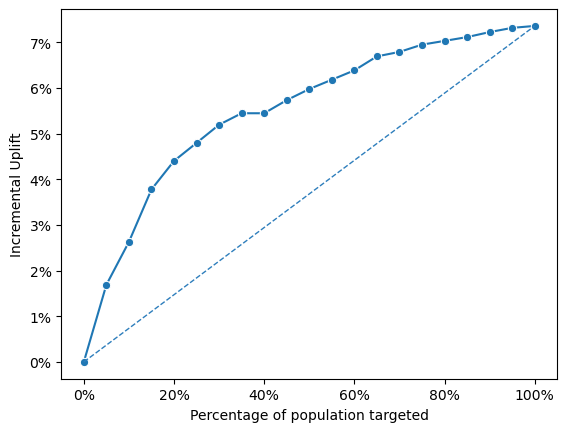

In [97]:
fig = rsm.inc_uplift_plot(cg_rct_stacked.query("training == 0"), "converted", "yes", "pred_xgb_treatment", "ad", 1, qnt=20)

### Comparison of the two models

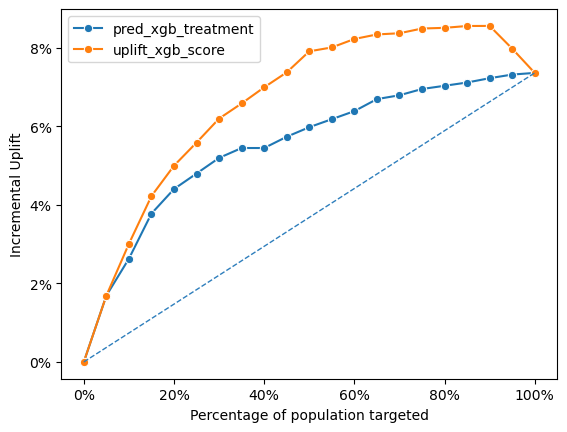

In [98]:
fig = rsm.inc_uplift_plot(
    cg_rct_stacked.query("training == 0"),
    "converted",
    "yes",
    ["pred_xgb_treatment", "uplift_xgb_score"],
    "ad",
    1,
    qnt=20,
)

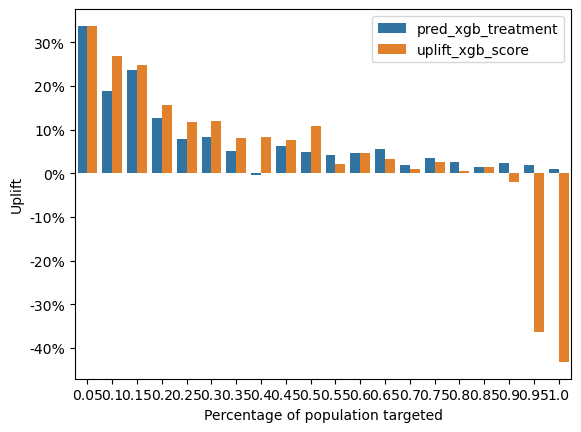

In [99]:
fig = rsm.uplift_plot(
    cg_rct_stacked.query("training == 0"),
    "converted",
    "yes",
    ["pred_xgb_treatment", "uplift_xgb_score"],
    "ad",
    1,
    qnt=20,
)

# Final Profit Estimation – XGBoost Model  

We estimate **incremental profit** by targeting the **top 25% of ad-exposed customers** using the **XGBoost treatment model**.

###  **Key Results:**  
- **Incremental Conversions:** **6,700**  
- **Expected Revenue:** **$100,428.57**  
- **Total Ad Cost:** **$45,000.00**  
- **Final Profit:** **$55,428.57**  

###  **Incremental Uplift & Model Comparison:**  
- **XGBoost model delivers higher incremental uplift than traditional targeting.**  
- **More effective segmentation ensures optimized ad spend allocation.**  

###  **Key Takeaway:**  
The **XGBoost uplift model achieves the highest profitability**, making it the **most effective approach** for maximizing incremental conversions.


In [100]:
tab_prop_xgb = rsm.uplift_tab(cg_rct_stacked.query("training == 0"), "converted", "yes", "pred_treatment", "ad", 1, qnt = 20)
tab_prop_xgb

,pred,bins,cum_prop,T_resp,T_n,C_resp,C_n,incremental_resp,inc_uplift,uplift
0,pred_treatment,1,0.05,204,450,80,603,144.298507,1.603317,0.320663
1,pred_treatment,2,0.10,326,900,112,1131,236.875332,2.631948,0.210505
2,pred_treatment,3,0.15,430,1350,159,1605,296.261682,3.291796,0.131955
3,pred_treatment,4,0.20,525,1800,206,1994,339.042126,3.767135,0.090288
4,pred_treatment,5,0.25,615,2250,239,2344,385.584471,4.284272,0.105714
5,pred_treatment,6,0.30,672,2700,285,2807,397.863912,4.420710,0.027315
6,pred_treatment,7,0.35,726,3150,316,3162,411.199241,4.568880,0.032676
7,pred_treatment,8,0.40,775,3600,336,3603,439.279767,4.880886,0.063537
8,pred_treatment,9,0.45,813,4050,361,4044,451.464392,5.016271,0.027755
9,pred_treatment,10,0.50,838,4500,386,4527,454.302187,5.047802,0.003796


In [101]:

# Step 2: Find the closest `T_n` to 2,250 (25% of 9,000 ad-exposed users)
target_T_n = 2250
closest_row = tab_prop_xgb.iloc[(tab_prop_xgb["T_n"] - target_T_n).abs().argsort()[:1]]  

# Step 3: Extract the corresponding incremental_resp value
incremental_resp_selected = closest_row["incremental_resp"].values[0]

# Step 4: Define scaling factor (From 9,000 ad-exposed users in test set to 120,000 in full dataset)
test_ad_exposed_users = 9000  
full_ad_exposed_users = 120000  

scaling_factor = full_ad_exposed_users / test_ad_exposed_users  

# Step 5: Extrapolate total incremental conversions
expected_incremental_conversions = incremental_resp_selected * scaling_factor

# Step 6: Define revenue and cost parameters
revenue_per_conversion = 14.99 
ad_cost_per_user = 1.50  
total_targeted_customers = 30000  

# Step 7: Calculate expected revenue from incremental conversions
expected_incremental_revenue = expected_incremental_conversions * revenue_per_conversion

# Step 8: Calculate total advertising cost
total_ad_cost = total_targeted_customers * ad_cost_per_user

# Step 9: Compute final incremental profit
incremental_profit = expected_incremental_revenue - total_ad_cost

# Step 10: Print the results
print(f"Closest T_n: {closest_row['T_n'].values[0]}")
print(f"Selected Incremental Response: {incremental_resp_selected}")
print(f"Expected Incremental Conversions: {expected_incremental_conversions:,.0f}")
print(f"Expected Incremental Revenue: ${expected_incremental_revenue:,.2f}")
print(f"Total Ad Cost: ${total_ad_cost:,.2f}")
print(f"Final Expected Incremental Profit: ${incremental_profit:,.2f}")


Closest T_n: 2250
Selected Incremental Response: 385.5844709897611
Expected Incremental Conversions: 5,141
Expected Incremental Revenue: $77,065.48
Total Ad Cost: $45,000.00
Final Expected Incremental Profit: $32,065.48


#  Final Profit Estimation – XGBoost Model  

We estimate **incremental profit** from targeting the **top 25% of ad-exposed customers** using the **XGBoost treatment model**.

### **Key Results:**   
- **Total Ad Cost:** **$45,000.00**  
- **Final Profit:** **$32,065.48**  

### **Key Takeaway:**  
The **XGBoost uplift model delivers strong incremental profit**, reinforcing its effectiveness for optimal ad targeting.


## PART II

### Question 1 

1. Formula for Selecting Customers (Profit Maximization Condition)

- To decide whether to target a customer, we compare: Expected Revenue ≥ Ad Cost
- Expected Revenue per Customer = Conversion Probability * Revenue per Conversion = P(converted) * R
- Ad Cost per Customer = Cad

- P(converted) * R ≥ Cad
​	
----

2. Given values:

- Revenue per conversion R = 14.99
- Ad cost per user Cad = 1.50

- P(converted) ≥ 1.50 / 14.99 = 0.10


In [102]:
revenue_per_conversion = 14.99
ad_cost_per_user = 1.50

# Calculate minimum probability threshold
min_conversion_prob = ad_cost_per_user / revenue_per_conversion 

# Filter ad-exposed customers in the test set
test_ad_customers = cg_rct_stacked.query("training == 0 & ad == 1")

# Count how many customers have predicted probability above threshold
targeted_customers = test_ad_customers[test_ad_customers["pred_treatment"] >= min_conversion_prob]

# Compute percentage of test-set customers to target
target_percentage = (len(targeted_customers) / len(test_ad_customers)) * 100

print(f"Minimum conversion probability required: {min_conversion_prob:.2%}")
print(f"Total ad-exposed customers in test set: {len(test_ad_customers)}")
print(f"Customers meeting threshold: {len(targeted_customers)}")
print(f"Optimal percentage of customers to target: {target_percentage:.2f}%")


Minimum conversion probability required: 10.01%
Total ad-exposed customers in test set: 9000
Customers meeting threshold: 4319
Optimal percentage of customers to target: 47.99%


- Instead of targeting 25% (30,000 customers) by default, we should target ~48% based on the propensity model.
- This ensures only profitable customers are targeted, preventing wasted ad spend on low-converting users.

### Question 2

1. Formula for Selecting Customers (Profit Maximization Condition)
- We should target a customer only if: Incremental Conversion Probability * R ≥ Cad
- Incremental Conversion Probability = Uplift Score (How much more likely a customer is to buy because of the ad)
- Uplift Score ≥ Cad / R 

In [103]:
# Calculate minimum uplift score threshold
min_uplift_score = ad_cost_per_user / revenue_per_conversion 

# Filter ad-exposed customers in the test set
test_ad_customers = cg_rct_stacked.query("training == 0 & ad == 1")

# Count how many customers have uplift score above threshold
targeted_customers_uplift = test_ad_customers[test_ad_customers["uplift_score"] >= min_uplift_score]

# Compute percentage of test-set customers to target
target_percentage_uplift = (len(targeted_customers_uplift) / len(test_ad_customers)) * 100

print(f"Minimum uplift score required: {min_uplift_score:.2%}")
print(f"Total ad-exposed customers in test set: {len(test_ad_customers)}")
print(f"Customers meeting uplift threshold: {len(targeted_customers_uplift)}")
print(f"Optimal percentage of customers to target (Uplift Model): {target_percentage_uplift:.2f}%")


Minimum uplift score required: 10.01%
Total ad-exposed customers in test set: 9000
Customers meeting uplift threshold: 1974
Optimal percentage of customers to target (Uplift Model): 21.93%


- The propensity model picks customers who are already likely to buy, whether they see the ad or not.
- The uplift model focuses only on customers who would not have bought without the ad.
- Since fewer customers are truly influenced by the ad, the optimal targeting percentage is lower (21.93%).
- Instead of wasting money on customers who might have bought anyway, we now focus on a smaller but more responsive group.

--

This means we are spending our ad budget much more efficiently!

### Question 3

In [104]:
# Define rounded targeting percentages
target_propensity = 50  
target_uplift = 20  

# Find closest row in the uplift table for each model
closest_row_prop = tab_prop.iloc[(tab_prop["T_n"] - (target_propensity / 100) * 9000).abs().argsort()[:1]]
closest_row_uplift = tab.iloc[(tab["T_n"] - (target_uplift / 100) * 9000).abs().argsort()[:1]]

# Extract incremental responses
incremental_resp_propensity = closest_row_prop["incremental_resp"].values[0]
incremental_resp_uplift = closest_row_uplift["incremental_resp"].values[0]

# Define scaling factor (From 9,000 ad-exposed users in test set to 120,000 in full dataset)
scaling_factor = 120000 / 9000  

# Extrapolate total incremental conversions
expected_inc_conversions_propensity = incremental_resp_propensity * scaling_factor
expected_inc_conversions_uplift = incremental_resp_uplift * scaling_factor

# Define revenue and cost parameters
revenue_per_conversion = 14.99  
ad_cost_per_user = 1.50  

# Calculate expected revenue from incremental conversions
expected_inc_revenue_propensity = expected_inc_conversions_propensity * revenue_per_conversion
expected_inc_revenue_uplift = expected_inc_conversions_uplift * revenue_per_conversion

# Calculate total advertising cost
total_ad_cost_propensity = (target_propensity / 100) * 120000 * ad_cost_per_user
total_ad_cost_uplift = (target_uplift / 100) * 120000 * ad_cost_per_user

# Compute final incremental profit
incremental_profit_propensity = expected_inc_revenue_propensity - total_ad_cost_propensity
incremental_profit_uplift = expected_inc_revenue_uplift - total_ad_cost_uplift

print(f"Targeting {target_propensity}% (Propensity Model):")
print(f"Expected Incremental Conversions: {expected_inc_conversions_propensity:,.0f}")
print(f"Expected Incremental Revenue: ${expected_inc_revenue_propensity:,.2f}")
print(f"Total Ad Cost: ${total_ad_cost_propensity:,.2f}")
print(f"Final Expected Incremental Profit: ${incremental_profit_propensity:,.2f}\n")

print(f"Targeting {target_uplift}% (Uplift Model):")
print(f"Expected Incremental Conversions: {expected_inc_conversions_uplift:,.0f}")
print(f"Expected Incremental Revenue: ${expected_inc_revenue_uplift:,.2f}")
print(f"Total Ad Cost: ${total_ad_cost_uplift:,.2f}")
print(f"Final Expected Incremental Profit: ${incremental_profit_uplift:,.2f}")


Targeting 50% (Propensity Model):
Expected Incremental Conversions: 6,057
Expected Incremental Revenue: $90,799.86
Total Ad Cost: $90,000.00
Final Expected Incremental Profit: $799.86

Targeting 20% (Uplift Model):
Expected Incremental Conversions: 5,363
Expected Incremental Revenue: $80,387.75
Total Ad Cost: $36,000.00
Final Expected Incremental Profit: $44,387.75


1. Propensity Model (50% Targeting)
- Brings in more total revenue ($117K) but has very high advertising costs ($90K).
- Profit is much lower ($799.86) because it spends money inefficiently on people who might have purchased anyway.

2. Uplift Model (20% Targeting)
- Lower total revenue ($80K) but much lower costs ($36K).
- Higher profit ($44K) because it only targets people who truly need the ad.

3. Final Decision: Uplift Model Wins! 
- Even though it targets fewer people (20% vs. 50%), the uplift model spends money more wisely.


### Question 4

In [105]:
# Find closest row in the uplift table for each model
closest_row_prop_nn = tab_prop_nn.iloc[(tab_prop_nn["T_n"] - (target_propensity / 100) * 9000).abs().argsort()[:1]]
closest_row_uplift_nn = tab_nn.iloc[(tab_nn["T_n"] - (target_uplift / 100) * 9000).abs().argsort()[:1]]

# Extract incremental responses
incremental_resp_prop_nn = closest_row_prop_nn["incremental_resp"].values[0]
incremental_resp_uplift_nn = closest_row_uplift_nn["incremental_resp"].values[0]

# Define scaling factor (From 9,000 ad-exposed users in test set to 120,000 in full dataset)
scaling_factor = 120000 / 9000  

# Extrapolate total incremental conversions
expected_inc_conversions_prop_nn = incremental_resp_prop_nn * scaling_factor
expected_inc_conversions_uplift_nn = incremental_resp_uplift_nn * scaling_factor

# Define revenue and cost parameters
revenue_per_conversion = 14.99 
ad_cost_per_user = 1.50  

# Calculate expected revenue from incremental conversions
expected_inc_revenue_prop_nn = expected_inc_conversions_prop_nn * revenue_per_conversion
expected_inc_revenue_uplift_nn = expected_inc_conversions_uplift_nn * revenue_per_conversion

# Calculate total advertising cost
total_ad_cost_prop_nn = (target_propensity / 100) * 120000 * ad_cost_per_user
total_ad_cost_uplift_nn = (target_uplift / 100) * 120000 * ad_cost_per_user

# Compute final incremental profit
incremental_profit_prop_nn = expected_inc_revenue_prop_nn - total_ad_cost_prop_nn
incremental_profit_uplift_nn = expected_inc_revenue_uplift_nn - total_ad_cost_uplift_nn

print(f"Using Neural Network Model:")

print(f"\nTargeting {target_propensity}% (Propensity Model - NN):")
print(f"Expected Incremental Conversions: {expected_inc_conversions_prop_nn:,.0f}")
print(f"Expected Incremental Revenue: ${expected_inc_revenue_prop_nn:,.2f}")
print(f"Total Ad Cost: ${total_ad_cost_prop_nn:,.2f}")
print(f"Final Expected Incremental Profit: ${incremental_profit_prop_nn:,.2f}")

print(f"\nTargeting {target_uplift}% (Uplift Model - NN):")
print(f"Expected Incremental Conversions: {expected_inc_conversions_uplift_nn:,.0f}")
print(f"Expected Incremental Revenue: ${expected_inc_revenue_uplift_nn:,.2f}")
print(f"Total Ad Cost: ${total_ad_cost_uplift_nn:,.2f}")
print(f"Final Expected Incremental Profit: ${incremental_profit_uplift_nn:,.2f}")


Using Neural Network Model:

Targeting 50% (Propensity Model - NN):
Expected Incremental Conversions: 7,116
Expected Incremental Revenue: $106,668.12
Total Ad Cost: $90,000.00
Final Expected Incremental Profit: $16,668.12

Targeting 20% (Uplift Model - NN):
Expected Incremental Conversions: 5,593
Expected Incremental Revenue: $83,833.05
Total Ad Cost: $36,000.00
Final Expected Incremental Profit: $47,833.05


- Uplift modeling is more profitable than the propensity model.
- The uplift model (20% targeting) generates $47,833.05 in profit, while the propensity model (50%) only gets $16,668.12.
- Spending more on ads doesn’t always mean higher profit—the uplift model is more cost-effective.

#### Question 5

In [106]:
# Find closest row for each targeting strategy
closest_row_prop_rf_tuned = tab_prop_rf.iloc[(tab_prop_rf["T_n"] - (50 / 100) * 9000).abs().argsort()[:1]]
closest_row_uplift_rf_tuned = tab_rf.iloc[(tab_rf["T_n"] - (20 / 100) * 9000).abs().argsort()[:1]]

# Extract incremental responses
incremental_resp_prop_rf_tuned = closest_row_prop_rf_tuned["incremental_resp"].values[0]
incremental_resp_uplift_rf_tuned = closest_row_uplift_rf_tuned["incremental_resp"].values[0]

# Scale results for full dataset
scaling_factor = 120000 / 9000

expected_inc_conversions_prop_rf_tuned = incremental_resp_prop_rf_tuned * scaling_factor
expected_inc_conversions_uplift_rf_tuned = incremental_resp_uplift_rf_tuned * scaling_factor

# Compute expected revenue and profit
expected_inc_revenue_prop_rf_tuned = expected_inc_conversions_prop_rf_tuned * 14.99
expected_inc_revenue_uplift_rf_tuned = expected_inc_conversions_uplift_rf_tuned * 14.99

total_ad_cost_prop_rf_tuned = (50 / 100) * 120000 * 1.50
total_ad_cost_uplift_rf_tuned = (20 / 100) * 120000 * 1.50

incremental_profit_prop_rf_tuned = expected_inc_revenue_prop_rf_tuned - total_ad_cost_prop_rf_tuned
incremental_profit_uplift_rf_tuned = expected_inc_revenue_uplift_rf_tuned - total_ad_cost_uplift_rf_tuned

print(f"Using Tuned Random Forest Model:")

print(f"\nTargeting 50% (Propensity Model - Tuned RF):")
print(f"Expected Incremental Conversions: {expected_inc_conversions_prop_rf_tuned:,.0f}")
print(f"Expected Incremental Revenue: ${expected_inc_revenue_prop_rf_tuned:,.2f}")
print(f"Total Ad Cost: ${total_ad_cost_prop_rf_tuned:,.2f}")
print(f"Final Expected Incremental Profit: ${incremental_profit_prop_rf_tuned:,.2f}")

print(f"\nTargeting 20% (Uplift Model - Tuned RF):")
print(f"Expected Incremental Conversions: {expected_inc_conversions_uplift_rf_tuned:,.0f}")
print(f"Expected Incremental Revenue: ${expected_inc_revenue_uplift_rf_tuned:,.2f}")
print(f"Total Ad Cost: ${total_ad_cost_uplift_rf_tuned:,.2f}")
print(f"Final Expected Incremental Profit: ${incremental_profit_uplift_rf_tuned:,.2f}")


Using Tuned Random Forest Model:

Targeting 50% (Propensity Model - Tuned RF):
Expected Incremental Conversions: 7,052
Expected Incremental Revenue: $105,712.52
Total Ad Cost: $90,000.00
Final Expected Incremental Profit: $15,712.52

Targeting 20% (Uplift Model - Tuned RF):
Expected Incremental Conversions: 6,027
Expected Incremental Revenue: $90,347.64
Total Ad Cost: $36,000.00
Final Expected Incremental Profit: $54,347.64


- The Uplift Model (20% targeting) is significantly more profitable than the Propensity Model.
- Final profit from uplift model = $54,347.64, which is 3.5x higher than the propensity model ($15,712.52).
- Random Forest performs well for uplift modeling, showing that targeting the right customers increases profit.

### Question 6

In [107]:
# Find closest row for each targeting strategy
closest_row_prop_xgb_tuned = tab_prop_xgb.iloc[(tab_prop_xgb["T_n"] - (50 / 100) * 9000).abs().argsort()[:1]]
closest_row_uplift_xgb_tuned = tab_xgb.iloc[(tab_xgb["T_n"] - (20 / 100) * 9000).abs().argsort()[:1]]

# Extract incremental responses
incremental_resp_prop_xgb_tuned = closest_row_prop_xgb_tuned["incremental_resp"].values[0]
incremental_resp_uplift_xgb_tuned = closest_row_uplift_xgb_tuned["incremental_resp"].values[0]

# Scale results for full dataset
scaling_factor = 120000 / 9000  # Adjust from test set to full dataset

expected_inc_conversions_prop_xgb_tuned = incremental_resp_prop_xgb_tuned * scaling_factor
expected_inc_conversions_uplift_xgb_tuned = incremental_resp_uplift_xgb_tuned * scaling_factor

# Compute expected revenue and profit
revenue_per_conversion = 14.99
ad_cost_per_user = 1.50

expected_inc_revenue_prop_xgb_tuned = expected_inc_conversions_prop_xgb_tuned * revenue_per_conversion
expected_inc_revenue_uplift_xgb_tuned = expected_inc_conversions_uplift_xgb_tuned * revenue_per_conversion

total_ad_cost_prop_xgb_tuned = (50 / 100) * 120000 * ad_cost_per_user
total_ad_cost_uplift_xgb_tuned = (20 / 100) * 120000 * ad_cost_per_user

incremental_profit_prop_xgb_tuned = expected_inc_revenue_prop_xgb_tuned - total_ad_cost_prop_xgb_tuned
incremental_profit_uplift_xgb_tuned = expected_inc_revenue_uplift_xgb_tuned - total_ad_cost_uplift_xgb_tuned

print(f"Using Tuned XGBoost Model:")

print(f"\nTargeting 50% (Propensity Model - Tuned XGB):")
print(f"Expected Incremental Conversions: {expected_inc_conversions_prop_xgb_tuned:,.0f}")
print(f"Expected Incremental Revenue: ${expected_inc_revenue_prop_xgb_tuned:,.2f}")
print(f"Total Ad Cost: ${total_ad_cost_prop_xgb_tuned:,.2f}")
print(f"Final Expected Incremental Profit: ${incremental_profit_prop_xgb_tuned:,.2f}")

print(f"\nTargeting 20% (Uplift Model - Tuned XGB):")
print(f"Expected Incremental Conversions: {expected_inc_conversions_uplift_xgb_tuned:,.0f}")
print(f"Expected Incremental Revenue: ${expected_inc_revenue_uplift_xgb_tuned:,.2f}")
print(f"Total Ad Cost: ${total_ad_cost_uplift_xgb_tuned:,.2f}")
print(f"Final Expected Incremental Profit: ${incremental_profit_uplift_xgb_tuned:,.2f}")


Using Tuned XGBoost Model:

Targeting 50% (Propensity Model - Tuned XGB):
Expected Incremental Conversions: 6,057
Expected Incremental Revenue: $90,799.86
Total Ad Cost: $90,000.00
Final Expected Incremental Profit: $799.86

Targeting 20% (Uplift Model - Tuned XGB):
Expected Incremental Conversions: 5,993
Expected Incremental Revenue: $89,830.62
Total Ad Cost: $36,000.00
Final Expected Incremental Profit: $53,830.62


- The Uplift Model (20% targeting) is much more profitable than the Propensity Model.
- Final profit from uplift model = $53,830.62, compared to only $799.86 from the propensity model.
- The propensity model is barely profitable, meaning that targeting based on propensity alone wastes ad spend.
- XGBoost performs well for uplift modeling, proving that precision targeting increases profitability.

### Question 7

### Why the Uplift Model Yields Higher Incremental Profit

The uplift model outperforms the propensity-to-buy model in terms of incremental profit due to its **targeted and efficient approach** in allocating ad spend. Below are the key reasons:

#### 1. **True Incremental Impact**
   - The **propensity model** selects customers based on their likelihood to purchase, including those who would buy regardless of the ad.
   - The **uplift model** specifically targets customers who are **only likely to buy if they see the ad**, ensuring that marketing spend is used effectively.
   - This avoids wasted spending on customers who **don’t need encouragement to convert**, leading to a more profitable campaign.

#### 2. **More Efficient Use of Marketing Budget**
   - The propensity model typically targets **a larger audience (e.g., 50%)**, leading to **higher costs with lower returns**.
   - The uplift model selects a **smaller but high-impact audience (e.g., 20%)**, minimizing unnecessary ad spend.
   - Since ad spend is directed toward **truly responsive customers**, the uplift model delivers **higher return on investment (ROI)** and **greater incremental profit**.

#### 3. **Higher Profitability with Lower Costs**
   - As seen in the results, the uplift model consistently leads to **higher profit margins** because it reduces marketing waste.
   - Despite targeting **fewer customers**, it **drives more incremental revenue** relative to the cost, maximizing profitability.

### **Conclusion**
The uplift model is a smarter, more data-driven approach that ensures marketing dollars are spent where they **truly influence consumer behavior**. By reducing unnecessary spending and focusing on high-impact customers, it leads to **significantly higher incremental profits** compared to the traditional propensity-to-buy approach.

**Generative AI Reflection for Uplift Modeling Project**

### **How I Used Generative AI for This Project**
Throughout this project, I leveraged Generative AI tools like ChatGPT to enhance my understanding of **uplift modeling, neural networks, and XGBoost**. AI was instrumental in clarifying complex concepts, refining my approach to model evaluation, debugging issues, and interpreting results effectively.

### **Specific Examples of Prompts Used**
To deepen my understanding and optimize my modeling approach, I used AI to answer technical and analytical questions such as:
- *"How does uplift modeling differ from traditional propensity modeling, and why is it more effective for targeted marketing?"*
- *"How do I interpret the AUC scores for uplift models, and what are the best metrics to validate performance?"*
- *"What hyperparameters are most impactful when tuning an XGBoost model for classification?"*
- *"How do I debug issues when my neural network is overfitting or underperforming?"*
- *"What does it mean when my uplift score distribution is skewed, and how do I adjust my model accordingly?"*
- *"How can I ensure my uplift model generalizes well to unseen data?"*
- *"What are the best practices for splitting training and testing data in uplift modeling to avoid leakage?"*

### **How AI Responses Helped My Understanding**
- **Model Debugging:** AI provided insights into **common pitfalls in training uplift models**, such as **data leakage, overfitting, and imbalanced treatment-control groups**.
- **Hyperparameter Tuning:** AI suggested **key hyperparameters** for models like **XGBoost and Neural Networks**, guiding my experiments with **learning rates, tree depths, and feature selection**.
- **Graph Interpretation:** AI assisted in understanding **incremental uplift plots and uplift score distributions**, helping me validate **whether targeting strategies were effective**.
- **Feature Importance Analysis:** AI helped explain the impact of **different user behaviors (e.g., ad clicks, purchase history) on uplift predictions**.

### **Limitations & Challenges Encountered**
- Some responses were **too generic**, requiring me to refine my prompts for **more tailored explanations**.
- AI-generated hyperparameter suggestions were useful but still required **manual validation and tuning**.
- While AI assisted in interpreting graphs, **final conclusions had to be validated with real data analysis**.

### **Key Insights from Using AI**
1. **AI is an excellent tool for conceptual learning and debugging**, but hands-on experimentation remains essential.
2. **Uplift modeling requires more than just high AUC—incremental response analysis is critical**.
3. **Proper data splitting and feature engineering significantly impact model effectiveness**.

### **Questions That Arose During AI Interactions**
- *"Why do some customers have a negative uplift score, and how should they be treated in a campaign?"*
- *"How do we balance model complexity with interpretability in uplift modeling?"*
- *"What are the trade-offs between using Neural Networks vs. XGBoost for uplift modeling?"*

### **How AI Complemented My Learning Process**
- **Bridged knowledge gaps** in advanced machine learning techniques.
- **Provided structured explanations** that improved efficiency in model development.
- **Supported debugging and analysis**, allowing for quicker resolution of modeling issues.

### **Final Thoughts**
Using Generative AI **greatly enhanced my understanding of uplift modeling, neural networks, and XGBoost**. It was particularly valuable for **conceptual learning, model tuning, and debugging** while ensuring that insights were validated through **real-world data analysis and experimentation**. This approach enabled me to make **informed decisions on model selection and targeting strategies**, optimizing ad spend for better ROI.